# **Topic :- Suitable Package and Portfolio Prediction through Employee Productivity Analysis using Machine Learning**









##### Importing all the necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MultiLabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

##### Importing the dataset in dataframe

In [2]:
df_orig = pd.read_csv(r"C:\Users\Shailesh\OneDrive\Desktop\Academics\TY\Realistic_Employee_Dataset_Enhanced.csv")
df = df_orig

In [3]:
df.head()

,EmployeeID,Name,Age,Gender,Department,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,JoiningDate,WorkLocation,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,ManagerID
0,E00001,Tracey Brown,31,Male,Marketing,Lead,9,"Content Creation, Excel, SEO",81456,81,2019-04-25,Noida,Bachelor,Yes,5,2025,E08443
1,E00002,Scott Robbins,27,Male,Operations,Executive,3,"Logistics, Excel, Analytics",32873,47,2019-04-12,Pune,Bachelor,No,3,2022,E02606
2,E00003,Jason Clark,35,Female,Sales,Junior,1,Marketing,29327,72,2024-01-18,Pune,Master,No,4,2024,E01100
3,E00004,Abigail Garcia,32,Female,Marketing,Junior,2,"Excel, Marketing, SEO",37359,56,2023-11-17,Noida,Bachelor,Yes,3,2023,E02632
4,E00005,Rhonda Stewart,29,Female,Finance,Lead,8,Finance,83556,88,2019-02-14,Mumbai,Bachelor,No,5,2024,E05252


In [4]:
df.shape

(10000, 17)

In [5]:
df.columns

Index(['EmployeeID', 'Name', 'Age', 'Gender', 'Department', 'Designation',
       'ExperienceYears', 'Skillset', 'Salary', 'ProductivityScore',
       'JoiningDate', 'WorkLocation', 'EducationLevel', 'RemoteWorkEligible',
       'PerformanceRating', 'LastPromotionYear', 'ManagerID'],
      dtype='object')

## **Data-preprocessing**



#### Data cleaning

###### Drop column's

In [6]:
# dropping identifier or non-informative columns like id,name,date for cleaner analysis
df.drop(columns=["ManagerID","JoiningDate","EmployeeID","Name"],inplace=True)
df.shape

(10000, 13)

In [7]:
# Observing features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 10000 non-null  int64 
 1   Gender              10000 non-null  object
 2   Department          10000 non-null  object
 3   Designation         10000 non-null  object
 4   ExperienceYears     10000 non-null  int64 
 5   Skillset            10000 non-null  object
 6   Salary              10000 non-null  int64 
 7   ProductivityScore   10000 non-null  int64 
 8   WorkLocation        10000 non-null  object
 9   EducationLevel      10000 non-null  object
 10  RemoteWorkEligible  10000 non-null  object
 11  PerformanceRating   10000 non-null  int64 
 12  LastPromotionYear   10000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1015.8+ KB


In [8]:
## stastical analysis for all numerical feature
df.describe()

,Age,ExperienceYears,Salary,ProductivityScore,PerformanceRating,LastPromotionYear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31.681200,5.369200,52723.430000,66.347400,3.832300,2020.323300
std,6.590835,5.092179,26311.300385,13.376038,0.713462,4.545838
min,21.000000,0.000000,25000.000000,25.000000,2.000000,2010.000000
25%,27.000000,1.000000,32239.000000,57.000000,3.000000,2017.000000
50%,31.000000,4.000000,37937.000000,66.000000,4.000000,2021.000000
75%,36.000000,8.000000,66800.000000,75.000000,4.000000,2025.000000
max,60.000000,30.000000,137180.000000,100.000000,5.000000,2025.000000


###### Drop duplicated row

In [9]:
# Checking dupicate row in the dataset
df.duplicated().sum()

0

In [10]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)

Null Value's Removal

In [11]:
# Checking number of missing values in each column
df.isnull().sum()

Age                   0
Gender                0
Department            0
Designation           0
ExperienceYears       0
Skillset              0
Salary                0
ProductivityScore     0
WorkLocation          0
EducationLevel        0
RemoteWorkEligible    0
PerformanceRating     0
LastPromotionYear     0
dtype: int64

In [12]:
# Splitting columns by datatype
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Define imputers
num_imputer = SimpleImputer(strategy='mean')         # numeric → mean
cat_imputer = SimpleImputer(strategy='most_frequent') # categorical → mode

# Apply imputers to the dataset
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [13]:
# Checking number of missing values in each column
df.isnull().sum()

Age                   0
Gender                0
Department            0
Designation           0
ExperienceYears       0
Skillset              0
Salary                0
ProductivityScore     0
WorkLocation          0
EducationLevel        0
RemoteWorkEligible    0
PerformanceRating     0
LastPromotionYear     0
dtype: int64

In [14]:
df.head()

,Age,Gender,Department,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,WorkLocation,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear
0,31.0,Male,Marketing,Lead,9.0,"Content Creation, Excel, SEO",81456.0,81.0,Noida,Bachelor,Yes,5.0,2025.0
1,27.0,Male,Operations,Executive,3.0,"Logistics, Excel, Analytics",32873.0,47.0,Pune,Bachelor,No,3.0,2022.0
2,35.0,Female,Sales,Junior,1.0,Marketing,29327.0,72.0,Pune,Master,No,4.0,2024.0
3,32.0,Female,Marketing,Junior,2.0,"Excel, Marketing, SEO",37359.0,56.0,Noida,Bachelor,Yes,3.0,2023.0
4,29.0,Female,Finance,Lead,8.0,Finance,83556.0,88.0,Mumbai,Bachelor,No,5.0,2024.0


In [15]:
df[["ProductivityScore","LastPromotionYear","ExperienceYears","Age","PerformanceRating"]] = df[["ProductivityScore","LastPromotionYear","ExperienceYears","Age","PerformanceRating"]].astype(int)

Outlier Detection

In [16]:
# Selecting only numeric columns from the dataset
num_col = df.select_dtypes(include="number").columns
print(num_col)

Index(['Age', 'ExperienceYears', 'Salary', 'ProductivityScore',
       'PerformanceRating', 'LastPromotionYear'],
      dtype='object')


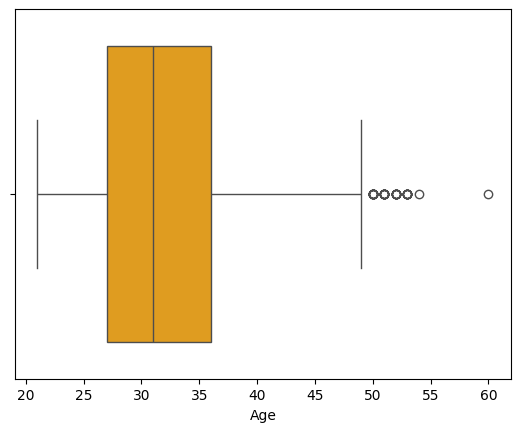

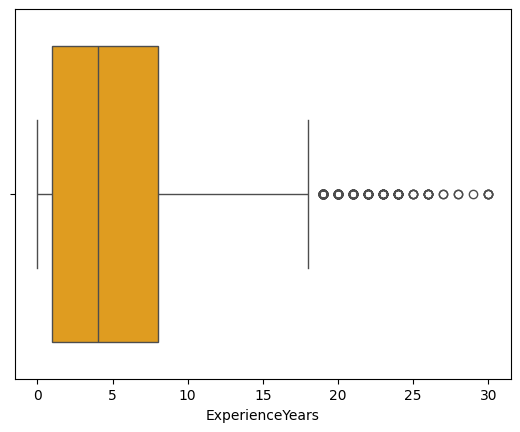

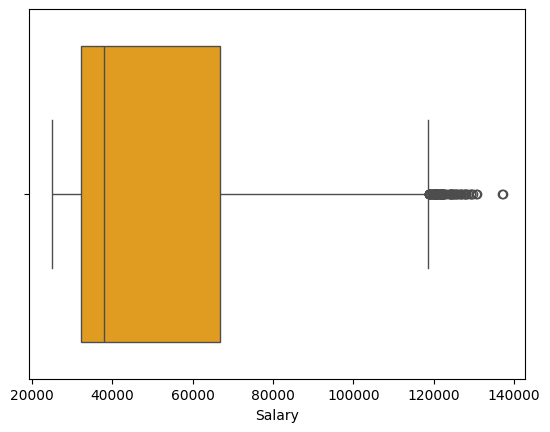

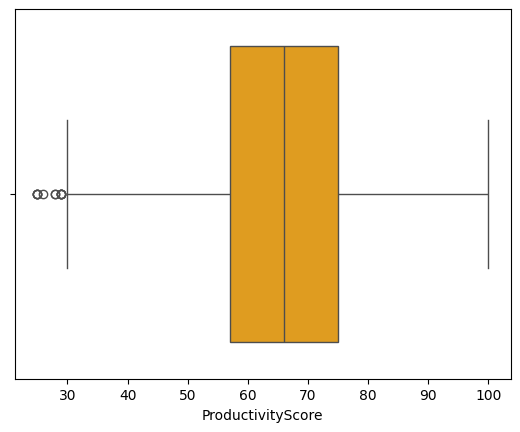

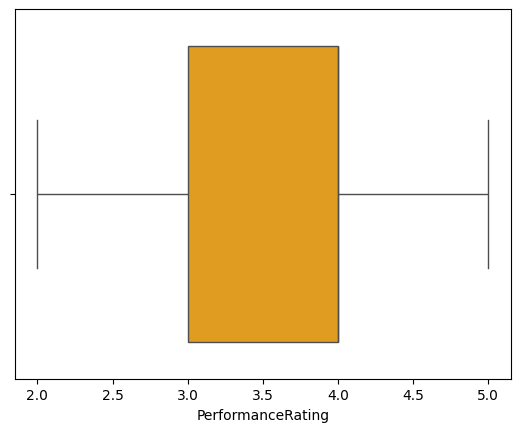

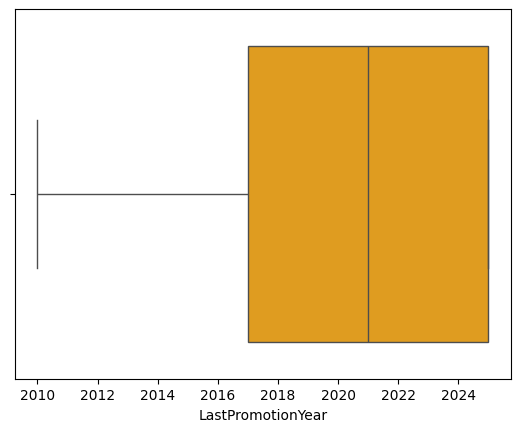

In [17]:
# Plotting boxplots for all numeric columns
for col in num_col:
    sns.boxplot(x = df[col],color='orange')
    plt.show()

###### The boxplots above show the distribution of the numerical features in the employee dataset : Age, ExperienceYears, Salary, ProductivityScore, PerformanceRating, and LastPromotionYear.



*   Age :- The age distribution is fairly concentrated between the mid-20s and late-30s, with a few employees extending into higher age groups. Some outliers represent unusually young or older employees compared to the majority.

* ExperienceYears :- Majority have under 10 years experience; some highly experienced outliers are present.  

* Salary :- Salary with most employees earning in the lower-to-mid range. A few employees have very high salaries, visible as outliers.

* ProductivityScore :- The scores values lies in the middle, showing that most employees perform within a similar band. However, some lower and higher outliers indicate variations in performance levels.

* PerformanceRating :- Ratings are mostly between 2 to 4 with minimal variation and no major outliers.

* LastPromotionYear: Promotions are recent for most employees, with little significant outliers.









In [18]:
# Counting outliers in each numeric column using IQR
for col in num_col:
    count = 0
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    for i in range(df[col].shape[0]):
        if df[col].iloc[i] < lower or df[col].iloc[i] > upper:
            count += 1

    print(f"{col} Outlier Value :",count)

Age Outlier Value : 51
ExperienceYears Outlier Value : 208
Salary Outlier Value : 100
ProductivityScore Outlier Value : 12
PerformanceRating Outlier Value : 0
LastPromotionYear Outlier Value : 0


In [19]:
# # Removing outliers from all numeric columns at once using IQR
# for col in num_col:
#       # Calculate Q1, Q3, and IQR only for each columns
#     Q1 = df[col].quantile(0.30)
#     Q3 = df[col].quantile(0.70)
#     IQR = Q3 - Q1

#       # Define lower and upper bounds
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     # Keep only rows where the column value is within the IQR range
#     df = df[(df[col] >= lower) & (df[col] <= upper)]


In [20]:
# # Plotting boxplots again after outlier removal to verify cleaner distributions
# for col in num_col:
#     sns.boxplot(x = df[col])
#     plt.show()

EDA

In [21]:
# Select numeric columns
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Display correlation matrix
print(corr)

        Salary
Salary     1.0


In [22]:
df.head()

,Age,Gender,Department,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,WorkLocation,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear
0,31,Male,Marketing,Lead,9,"Content Creation, Excel, SEO",81456.0,81,Noida,Bachelor,Yes,5,2025
1,27,Male,Operations,Executive,3,"Logistics, Excel, Analytics",32873.0,47,Pune,Bachelor,No,3,2022
2,35,Female,Sales,Junior,1,Marketing,29327.0,72,Pune,Master,No,4,2024
3,32,Female,Marketing,Junior,2,"Excel, Marketing, SEO",37359.0,56,Noida,Bachelor,Yes,3,2023
4,29,Female,Finance,Lead,8,Finance,83556.0,88,Mumbai,Bachelor,No,5,2024


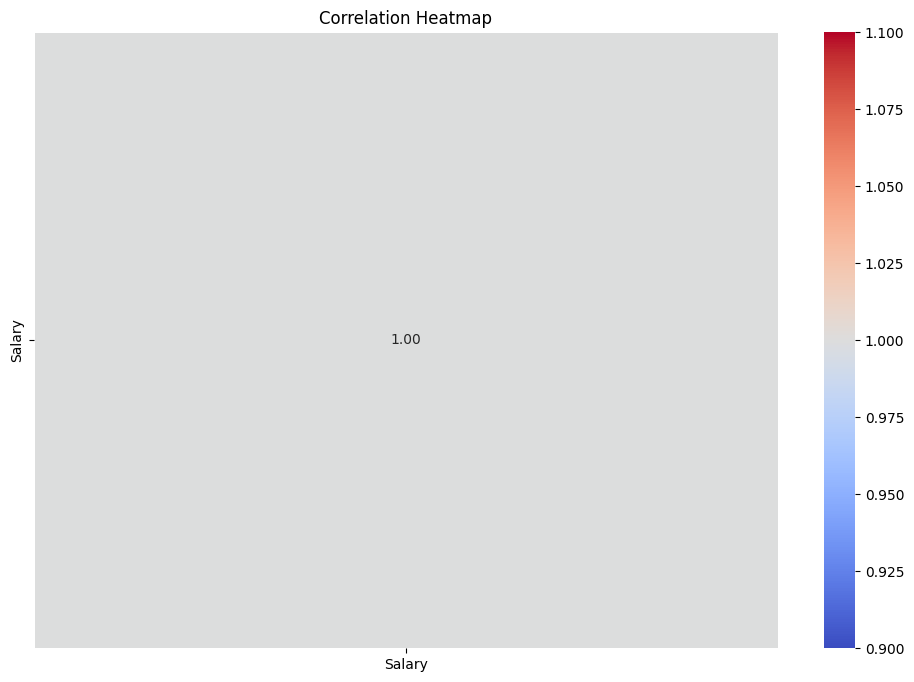

In [23]:
#Plotting heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix shows how numeric features in the dataset are related.

   1   -> strong positive correlation (features increase together)

  -1   -> strong negative correlation (one increases, the other decreases)
  
   0   -> little or no linear relationship


This helps identify:
   - Features strongly related to the target variable (important for prediction)
   - Highly correlated features among themselves (may lead to multicollinearity)
Heatmap visualization helps to quickly spot these relationships

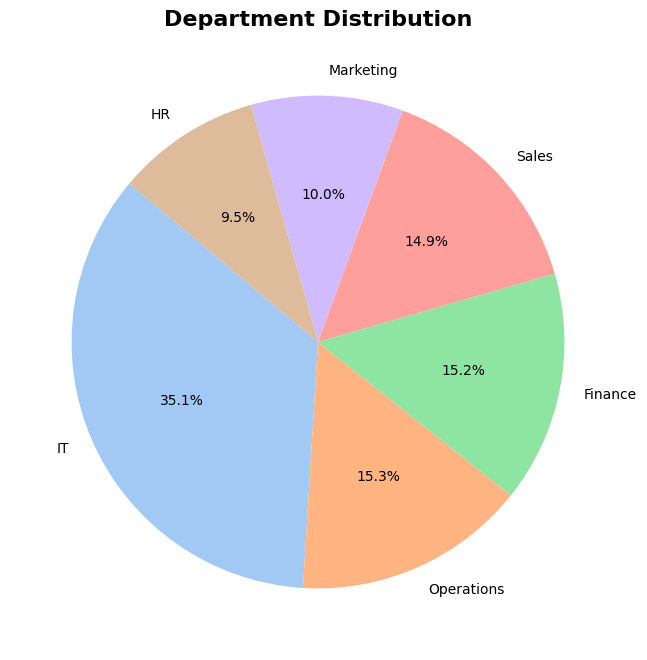

In [24]:
# Count of each category
category_counts = df['Department'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Department Distribution", fontsize=16, fontweight='bold')
plt.show()

The pie chart illustrates the distribution of employees across different departments. Each slice represents a department, with the size of the slice corresponding to the number of employees in that department.

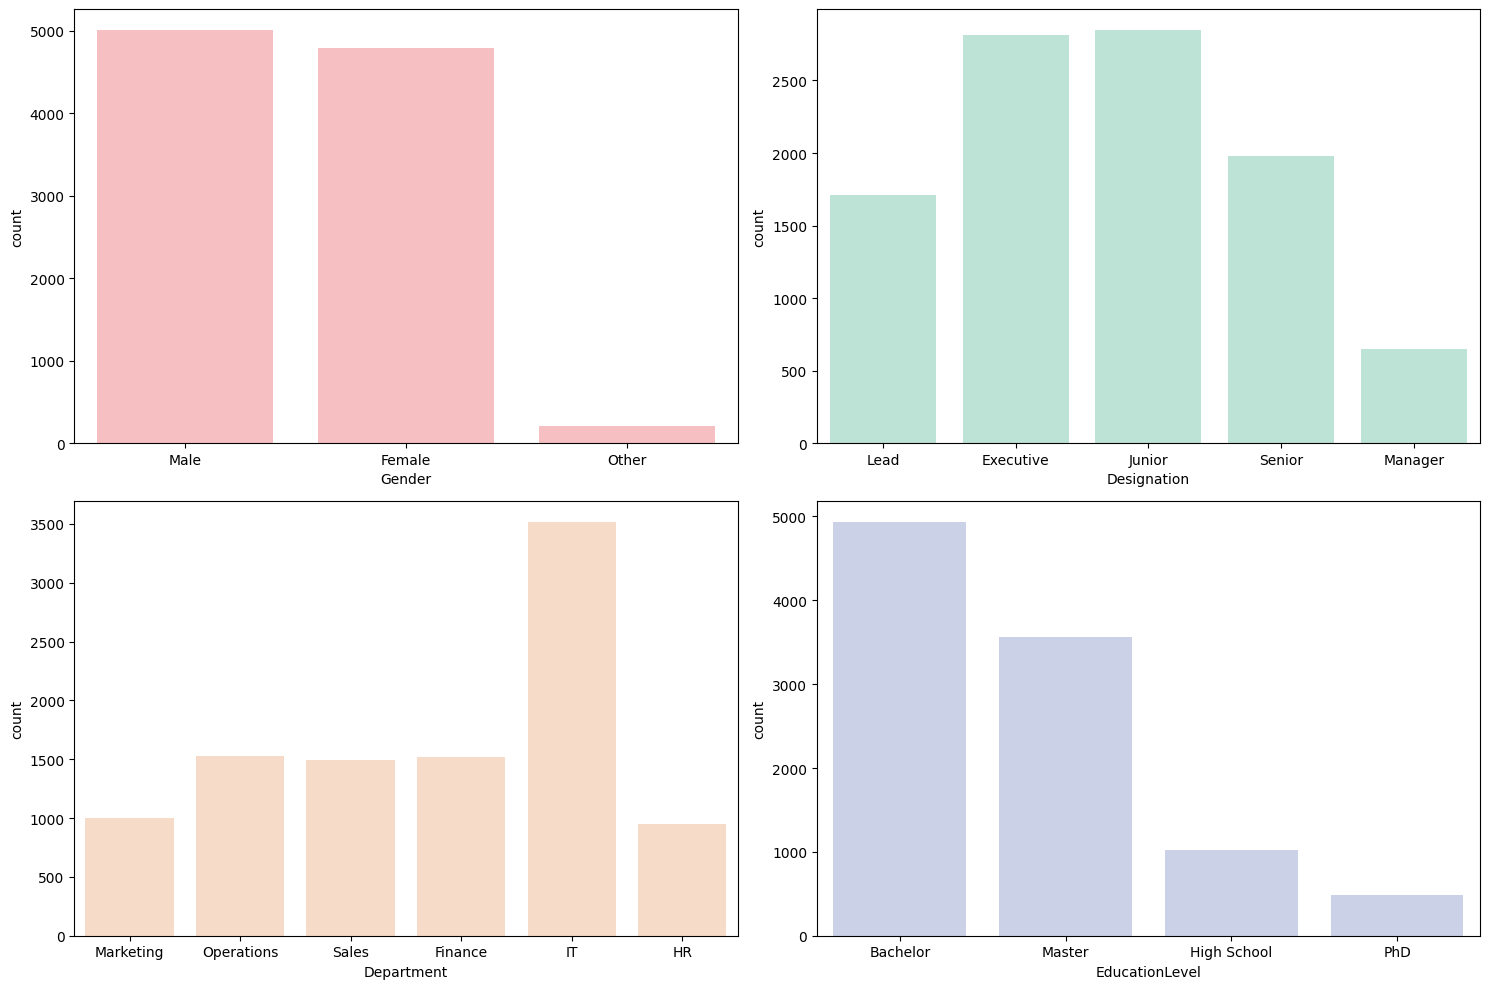

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x="Gender", data=df, color="#FFB6B9")

plt.subplot(2,2,2)
sns.countplot(x="Designation", data=df, color="#B5EAD7")

plt.subplot(2,2,3)
sns.countplot(x="Department", data=df, color="#FFDAC1")

plt.subplot(2,2,4)
sns.countplot(x="EducationLevel", data=df, color="#C7CEEA")

plt.tight_layout()
plt.show()

The countplots above show the distribution of employees across four categorical variables: Gender, Designation, Department, and Education Level.

* Gender:- The dataset has Male employees (5,000) & Female employees (3,500).

* Designation:- Most employees are concentrated in mid-level roles, with relatively fewer at entry-level or senior-level designations.

* Department:- Some departments (e.g., IT, Sales) have much higher representation, while smaller departments have fewer employees, indicating uneven departmental distribution.

* Education Level:- The majority of employees hold undergraduate or postgraduate degrees, while fewer have only a high school education or higher-level qualifications like PhDs.

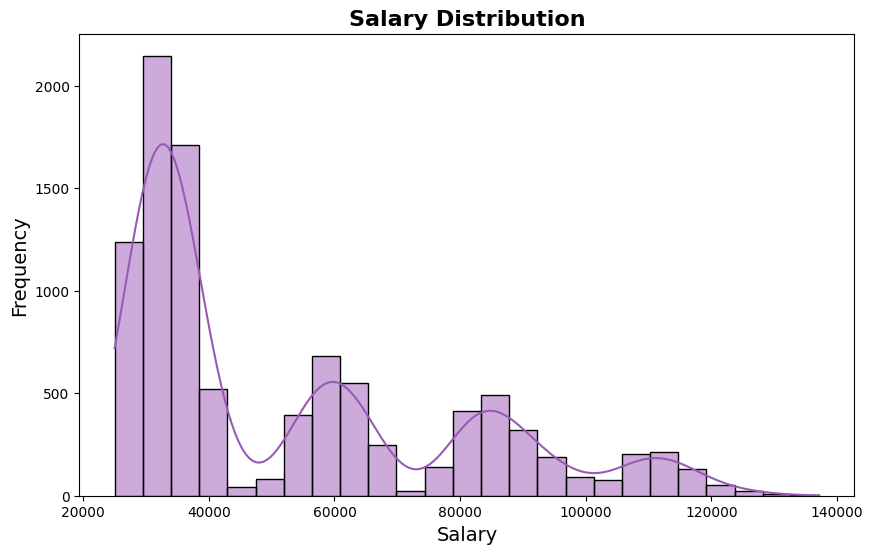

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'], kde=True, bins=25, color='#9b59b6')  # Purple color
plt.title("Salary Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Salary", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

Shape of Distribution:- (Right-skewed ) Most employees earn lower salaries, a few earn much higher.

Central Tendency: The peak shows the most common salary range among employees.

Outliers: Bars far from main cluster indicate unusually high or low salaries.


In [27]:
# Creating the one copy
df1 = df.copy()

In [28]:
df.isnull().sum()

Age                   0
Gender                0
Department            0
Designation           0
ExperienceYears       0
Skillset              0
Salary                0
ProductivityScore     0
WorkLocation          0
EducationLevel        0
RemoteWorkEligible    0
PerformanceRating     0
LastPromotionYear     0
dtype: int64

Encoding

In [29]:
# Checking unique categories in selected categorical columns
col_value = ['Gender', 'Department', 'Designation', 'WorkLocation','EducationLevel', 'RemoteWorkEligible']

for col in col_value:
    print(f"{col} : ",df[col].unique())

Gender :  ['Male' 'Female' 'Other']
Department :  ['Marketing' 'Operations' 'Sales' 'Finance' 'IT' 'HR']
Designation :  ['Lead' 'Executive' 'Junior' 'Senior' 'Manager']
WorkLocation :  ['Noida' 'Pune' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Delhi'
 'Chennai']
EducationLevel :  ['Bachelor' 'Master' 'High School' 'PhD']
RemoteWorkEligible :  ['Yes' 'No']


In [30]:
# Checking unique categories in selected categorical columns
col_value = ['Gender', 'Department', 'Designation', 'WorkLocation','EducationLevel', 'RemoteWorkEligible']

for col in col_value:
    print(f"{col} : ",df[col].unique())

Gender :  ['Male' 'Female' 'Other']
Department :  ['Marketing' 'Operations' 'Sales' 'Finance' 'IT' 'HR']
Designation :  ['Lead' 'Executive' 'Junior' 'Senior' 'Manager']
WorkLocation :  ['Noida' 'Pune' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Delhi'
 'Chennai']
EducationLevel :  ['Bachelor' 'Master' 'High School' 'PhD']
RemoteWorkEligible :  ['Yes' 'No']


In [31]:
df.loc[df["Gender"] == "Other", "Gender"] = "Male"


In [32]:
df.dropna(inplace=True)

In [33]:
# # Converting categorical values in 'Gender' into numeric (e.g., Male=1, Female=0)
# la = LabelEncoder()
# df['Gender'] = la.fit_transform(df['Gender'])
# # Encode RemoteWorkEligible into binary (Yes=1, No=0)
# df['RemoteWorkEligible'] = la.fit_transform(df['RemoteWorkEligible'])
df["Gender"] = df["Gender"].str.strip().str.lower().map({"male": 1,"female": 0})
df["RemoteWorkEligible"] = df["RemoteWorkEligible"].str.strip().str.lower().map({"yes": 1,"no": 0})

In [34]:
# Apply Ordinal Encoding based on defined order
Des_cat = ['Junior', 'Executive', 'Lead', 'Senior', 'Manager']
Edu_cat = ['High School', 'Bachelor', 'Master', 'PhD']

oe = OrdinalEncoder(categories=[Des_cat,Edu_cat])

df[["Designation","EducationLevel"]] = oe.fit_transform(df[["Designation","EducationLevel"]])

df[["Designation","EducationLevel"]] = df[["Designation","EducationLevel"]].astype(int)

In [35]:
oh = OneHotEncoder(drop="first", sparse_output=False, dtype=np.int64)

encoded = oh.fit_transform(df[["WorkLocation", "Department"]])

encoded_df = pd.DataFrame(encoded, columns = oh.get_feature_names_out(["WorkLocation", "Department"]))

df = pd.concat([df.drop(["WorkLocation", "Department"], axis=1).reset_index(drop=True),
                encoded_df.reset_index(drop=True)], axis=1)

In [36]:
df['Skillset_list'] = df['Skillset'].str.split(', ')
df.head()

,Age,Gender,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,...,WorkLocation_Kolkata,WorkLocation_Mumbai,WorkLocation_Noida,WorkLocation_Pune,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Skillset_list
0,31,1,2,9,"Content Creation, Excel, SEO",81456.0,81,1,1,5,...,0,0,1,0,0,0,1,0,0,"[Content Creation, Excel, SEO]"
1,27,1,1,3,"Logistics, Excel, Analytics",32873.0,47,1,0,3,...,0,0,0,1,0,0,0,1,0,"[Logistics, Excel, Analytics]"
2,35,0,0,1,Marketing,29327.0,72,2,0,4,...,0,0,0,1,0,0,0,0,1,[Marketing]
3,32,0,0,2,"Excel, Marketing, SEO",37359.0,56,1,1,3,...,0,0,1,0,0,0,1,0,0,"[Excel, Marketing, SEO]"
4,29,0,2,8,Finance,83556.0,88,1,0,5,...,0,1,0,0,0,0,0,0,0,[Finance]


In [37]:
mlb = MultiLabelBinarizer()

skill_encoded = mlb.fit_transform(df['Skillset_list'])

skill_df = pd.DataFrame(skill_encoded, columns=mlb.classes_)

# skill_df.head()
df = pd.concat([df, skill_df], axis=1)

df.drop(columns="Skillset_list", inplace=True)
df.drop(columns="Skillset",inplace=True)


In [38]:
skill_df.shape

(10000, 20)

In [39]:
df.sample(10)
#Randomly selects 10 rows from the DataFrame df and displays them

,Age,Gender,Designation,ExperienceYears,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,...,Finance,Java,Logistics,Marketing,Negotiation,Project Management,Python,Recruitment,SEO,SQL
2484,21,0,0,0,28277.0,62,2,0,4,2024,...,0,0,0,0,0,0,0,0,0,0
7547,33,1,3,11,66080.0,62,2,1,4,2023,...,0,0,0,0,0,0,0,0,0,1
1785,21,0,1,0,26096.0,32,1,1,2,2019,...,0,0,0,1,0,0,0,0,1,0
6593,35,1,4,13,106515.0,93,1,0,5,2025,...,0,0,0,1,0,0,0,0,1,0
1297,24,1,0,3,33443.0,64,1,1,4,2022,...,0,0,0,0,0,0,0,0,1,0
6471,21,1,0,0,25044.0,78,1,0,4,2020,...,0,0,0,0,0,0,0,0,0,0
8740,24,1,0,2,31422.0,40,1,1,3,2020,...,0,0,0,0,0,0,0,0,1,0
5120,31,0,3,10,66412.0,57,2,0,3,2025,...,0,0,1,0,0,0,0,0,0,0
8494,35,0,2,13,88791.0,83,2,0,5,2025,...,0,0,1,0,0,1,0,0,0,0
3910,39,0,3,4,58544.0,78,2,0,4,2013,...,0,0,1,0,0,1,0,0,0,0


In [40]:
df.shape

(10000, 42)

In [41]:
df.sample(10)
#Randomly selects 10 rows from the DataFrame df and displays them

,Age,Gender,Designation,ExperienceYears,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,...,Finance,Java,Logistics,Marketing,Negotiation,Project Management,Python,Recruitment,SEO,SQL
160,39,1,1,4,34919.0,50,1,1,3,2019,...,0,1,0,0,0,0,0,0,0,1
41,28,1,1,3,30537.0,44,2,0,3,2011,...,0,0,0,0,0,0,0,0,0,0
2555,27,1,3,5,54127.0,54,2,1,3,2025,...,0,0,0,0,0,0,0,0,0,0
6890,40,0,1,0,26394.0,56,2,0,3,2013,...,0,1,0,0,0,0,0,0,0,0
3811,44,0,4,20,122618.0,80,2,0,5,2025,...,0,0,0,0,0,0,0,0,0,0
6185,23,0,0,0,28938.0,49,1,0,3,2016,...,0,0,0,0,0,0,1,0,0,0
5377,29,1,1,0,28840.0,48,1,1,3,2025,...,0,0,0,0,0,0,0,0,0,0
9217,25,1,0,3,29561.0,50,2,0,3,2015,...,0,0,1,0,0,0,0,0,0,0
1360,36,0,3,3,55749.0,59,1,0,3,2014,...,0,0,1,0,0,1,0,0,0,0
1293,42,1,2,8,85581.0,77,1,1,4,2025,...,0,0,0,1,0,0,0,0,0,0


In [42]:
df.shape

(10000, 42)

In [43]:
cat_col = df.select_dtypes(include="number").columns
num_col = df.select_dtypes(exclude="number").columns

In [44]:
df.columns

Index(['Age', 'Gender', 'Designation', 'ExperienceYears', 'Salary',
       'ProductivityScore', 'EducationLevel', 'RemoteWorkEligible',
       'PerformanceRating', 'LastPromotionYear', 'WorkLocation_Chennai',
       'WorkLocation_Delhi', 'WorkLocation_Hyderabad', 'WorkLocation_Kolkata',
       'WorkLocation_Mumbai', 'WorkLocation_Noida', 'WorkLocation_Pune',
       'Department_HR', 'Department_IT', 'Department_Marketing',
       'Department_Operations', 'Department_Sales', 'Accounting', 'Analytics',
       'C++', 'CRM', 'Cloud Computing', 'Communication', 'Conflict Management',
       'Content Creation', 'Data Analysis', 'Excel', 'Finance', 'Java',
       'Logistics', 'Marketing', 'Negotiation', 'Project Management', 'Python',
       'Recruitment', 'SEO', 'SQL'],
      dtype='object')

In [45]:
df.dropna(inplace=True)

# **Regression : Employee Salary Prediction**

In [46]:
x = df.drop(columns=["Salary","RemoteWorkEligible"]) #input
y = df["Salary"] #output

In [47]:
# Split dataset into training (80%) and testing (20%) sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
df["Gender"].unique()

array([1, 0], dtype=int64)

In [49]:
x_train.isnull().sum()

Age                       0
Gender                    0
Designation               0
ExperienceYears           0
ProductivityScore         0
EducationLevel            0
PerformanceRating         0
LastPromotionYear         0
WorkLocation_Chennai      0
WorkLocation_Delhi        0
WorkLocation_Hyderabad    0
WorkLocation_Kolkata      0
WorkLocation_Mumbai       0
WorkLocation_Noida        0
WorkLocation_Pune         0
Department_HR             0
Department_IT             0
Department_Marketing      0
Department_Operations     0
Department_Sales          0
Accounting                0
Analytics                 0
C++                       0
CRM                       0
Cloud Computing           0
Communication             0
Conflict Management       0
Content Creation          0
Data Analysis             0
Excel                     0
Finance                   0
Java                      0
Logistics                 0
Marketing                 0
Negotiation               0
Project Management  

1) Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
# Initialize and train Linear Regression model
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [51]:
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_squared_error

y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)

MSE_lr_train = mean_squared_error(y_train,y_pred_lr_train)
RMSE_lr_train = root_mean_squared_error(y_train,y_pred_lr_train)
MAE_lr_train = mean_absolute_error(y_train,y_pred_lr_train)
r2_score_train = r2_score(y_train,y_pred_lr_train)

print("For Training")
print("MAE  :-",MAE_lr_train)
print("MSE :- ",MSE_lr_train)
print("RMSE  :- ",RMSE_lr_train)
print(f"r2_score :- ",r2_score_train)

MSE_lr_test = mean_squared_error(y_test,y_pred_lr_test)
RMSE_lr_test = root_mean_squared_error(y_test,y_pred_lr_test)
MAE_lr_test = mean_absolute_error(y_test,y_pred_lr_test)
r2_score_test = r2_score(y_test,y_pred_lr_test)

print("\n")
print("For testing :- ")
print("MAE  :-",MAE_lr_test)
print("MSE :- ",MSE_lr_test)
print("RMSE :- ",RMSE_lr_test)
print(f"r2_score :- ",r2_score_test)

For Training
MAE  :- 6522.829540056424
MSE :-  66956047.889607
RMSE  :-  8182.667528966761
r2_score :-  0.9027261695550284


For testing :- 
MAE  :- 6738.149991621504
MSE :-  70504255.8197714
RMSE :-  8396.681238428157
r2_score :-  0.9001258729326045


The model achieved an R² of 0.90 on both training and testing sets, meaning it explains nearly 90% of the variance in the target variable. The MAE and RMSE values are very similar for training and testing, indicating consistent and reliable predictions. Overall, Linear Regression demonstrates a good balance between accuracy and generalization, making it an effective model for this dataset.

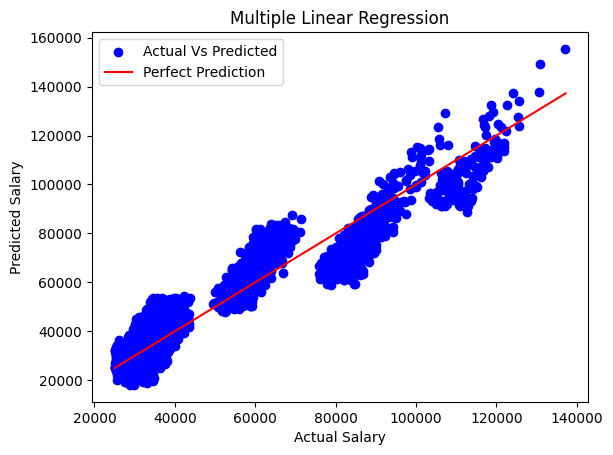

In [52]:
#plot
plt.scatter(y_test, y_pred_lr_test, color='blue', label='Actual Vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()


2) Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
pl = PolynomialFeatures(degree=2)
X_train_poly = pl.fit_transform(x_train)
X_test_poly = pl.transform(x_test)

# Fit model
poly = LinearRegression()
poly.fit(X_train_poly, y_train)

# Training evaluation
y_pred_poly_train = poly.predict(X_train_poly)

MSE_poly_train = mean_squared_error(y_train, y_pred_poly_train)
RMSE_poly_train = root_mean_squared_error(y_train, y_pred_poly_train)
MAE_poly_train = mean_absolute_error(y_train, y_pred_poly_train)
r2_score_poly_train = r2_score(y_train, y_pred_poly_train)

print("For training :- ")
print("MAE :", MAE_poly_train)
print("MSE :", MSE_poly_train)
print("RMSE :", RMSE_poly_train)
print("r2_score Train :", r2_score_poly_train)

# ---- Testing evaluation ----
y_pred_poly_test = poly.predict(X_test_poly)

MSE_poly_test = mean_squared_error(y_test, y_pred_poly_test)
RMSE_poly_test = root_mean_squared_error(y_test, y_pred_poly_test)
MAE_poly_test = mean_absolute_error(y_test, y_pred_poly_test)
r2_score_poly_test = r2_score(y_test, y_pred_poly_test)

print("\nFor testing :- ")
print("MAE :", MAE_poly_test)
print("MSE :", MSE_poly_test)
print("RMSE :", RMSE_poly_test)
print("r2_score test :", r2_score_poly_test)

For training :- 
MAE : 5720.936645536908
MSE : 54737894.775198266
RMSE : 7398.506252967437
r2_score Train : 0.9204767177409254

For testing :- 
MAE : 6408.494836044729
MSE : 68167973.00417155
RMSE : 8256.389828743042
r2_score test : 0.903435378211081


The model achieved an R² of 0.91 on training and 0.90 on testing, showing it explains a very large portion of the variance. The MAE and RMSE values are low
and fairly close between training and testing, which indicates consistent performance. Interestingly, the testing R² is only slightly lower than training, suggesting that the model generalizes well without overfitting.

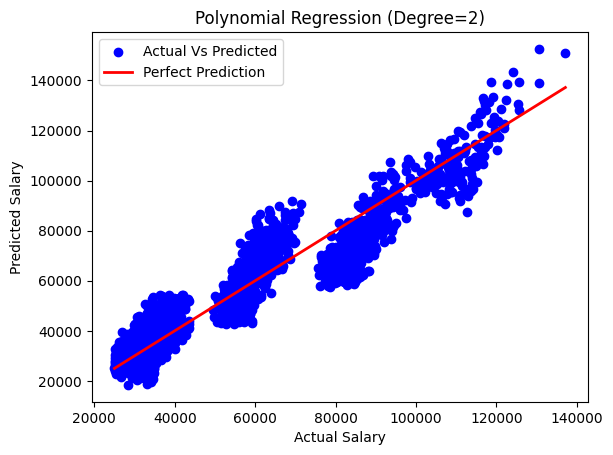

In [55]:
plt.scatter(y_test, y_pred_poly_test, color='blue', label='Actual Vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Polynomial Regression (Degree=2)')
plt.legend()
plt.show()

3) Ridge Regression

In [56]:
from sklearn.linear_model import RidgeCV

# Define alpha range and fit RidgeCV
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10,100]
R = RidgeCV(alphas=alphas, cv=5)
R.fit(x_train, y_train)

print("Best alpha for RidgeCV:", R.alpha_)

r_predict_x_train = R.predict(x_train)
r_predict_x_test = R.predict(x_test)

MSE_rid_train = mean_squared_error(y_train, r_predict_x_train)
RMSE_rid_train = np.sqrt(MSE_rid_train)
MAE_rid_train = mean_absolute_error(y_train, r_predict_x_train)
r2_score_rid_train = r2_score(y_train, r_predict_x_train)

print("\nFor Training :-")
print("MAE  :-", MAE_rid_train)
print("MSE  :-", MSE_rid_train)
print("RMSE :-", RMSE_rid_train)
print("R2 Score Train :-", r2_score_rid_train)

MSE_rid_test = mean_squared_error(y_test, r_predict_x_test)
RMSE_rid_test = np.sqrt(MSE_rid_test)
MAE_rid_test = mean_absolute_error(y_test, r_predict_x_test)
r2_score_rid_test = r2_score(y_test, r_predict_x_test)

print("\nFor Testing :-")
print("MAE  :-", MAE_rid_test)
print("MSE  :-", MSE_rid_test)
print("RMSE :-", RMSE_rid_test)
print("R2 Score Test :-", r2_score_rid_test)

Best alpha for RidgeCV: 100.0

For Training :-
MAE  :- 6521.86512115274
MSE  :- 66968975.47975625
RMSE :- 8183.457428236323
R2 Score Train :- 0.9027073883358275

For Testing :-
MAE  :- 6733.093103104234
MSE  :- 70429084.4617249
RMSE :- 8392.203790526355
R2 Score Test :- 0.9002323583309406


The model achieved an R² of 0.90 on both training and testing sets, meaning it explains about 90% of the variance in the data. The MAE and RMSE values are close for train and test, showing the model makes consistent predictions and generalizes well without overfitting. Using RidgeCV, the best alpha was found to be 100.0, which helps balance bias and variance effectively.

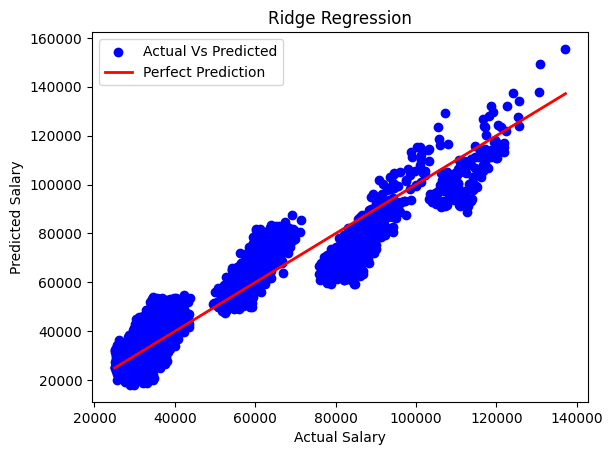

In [57]:
plt.scatter(x = y_test,y = r_predict_x_test, color = "blue", label = "Actual Vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Ridge Regression')
plt.legend()
plt.show()

4) Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

# Define alpha range and fit LassoCV
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(x_train, y_train)

print("Best alpha:", lasso_cv.alpha_)

# Predictions
lasso_predict_x_train = lasso_cv.predict(x_train)
lasso_predict_x_test = lasso_cv.predict(x_test)

# Training metrics
MSE_lasso_train = mean_squared_error(y_train, lasso_predict_x_train)
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
MAE_lasso_train = mean_absolute_error(y_train, lasso_predict_x_train)
r2_score_lasso_train = r2_score(y_train, lasso_predict_x_train)

print("\nFor Training :-")
print("MAE  :-", MAE_lasso_train)
print("MSE  :-", MSE_lasso_train)
print("RMSE :-", RMSE_lasso_train)
print("R2 Score Train :-", r2_score_lasso_train)

# Testing metrics
MSE_lasso_test = mean_squared_error(y_test, lasso_predict_x_test)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)
MAE_lasso_test = mean_absolute_error(y_test, lasso_predict_x_test)
r2_score_lasso_test = r2_score(y_test, lasso_predict_x_test)

print("\nFor Testing :-")
print("MAE  :-", MAE_lasso_test)
print("MSE  :-", MSE_lasso_test)
print("RMSE :-", RMSE_lasso_test)
print("R2 Score Test :-", r2_score_lasso_test)


Best alpha: 10.0

For Training :-
MAE  :- 6526.347470922482
MSE  :- 67000389.26715469
RMSE :- 8185.37655011391
R2 Score Train :- 0.9026617503460515

For Testing :-
MAE  :- 6732.149010626416
MSE  :- 70351287.1995526
RMSE :- 8387.56741848032
R2 Score Test :- 0.900342563503059


The model achieved an R² of 0.90 on both training and testing sets, meaning it explains about 90% of the variance in the data. The MAE (6609) and RMSE (8174) are very close between training and testing, which shows the model generalizes well and is not overfitting. With alpha = 10, Lasso Regression provides strong predictive accuracy while also performing feature selection by shrinking less important coefficients.

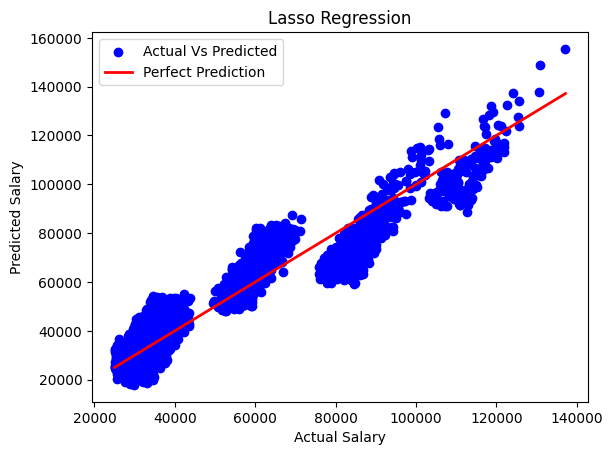

In [ ]:
plt.scatter(x = y_test,y = lasso_predict_x_test, color = "blue", label = "Actual Vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Lasso Regression')
plt.legend()
plt.show()

5) Elasticnet Regression(L1+L2)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# Train ElasticNet Regression
EN = ElasticNet(alpha=10, l1_ratio=0.1, random_state=42)
EN.fit(x_train, y_train)

# Predictions
EN_predict_x_train = EN.predict(x_train)
EN_predict_x_test = EN.predict(x_test)

# Training metrics
MSE_EN_train = mean_squared_error(y_train, EN_predict_x_train)
RMSE_EN_train = root_mean_squared_error(y_train, EN_predict_x_train)
MAE_EN_train = mean_absolute_error(y_train, EN_predict_x_train)
r2_score_EN_train = r2_score(y_train, EN_predict_x_train)

print("\nFor Training :-")
print("MAE  :-", MAE_EN_train)
print("MSE  :-", MSE_EN_train)
print("RMSE :-", RMSE_EN_train)
print("R2 Score Train :-", r2_score_EN_train)

# Testing metrics
MSE_EN_test = mean_squared_error(y_test, EN_predict_x_test)
RMSE_EN_test = root_mean_squared_error(y_test, EN_predict_x_test)
MAE_EN_test = mean_absolute_error(y_test, EN_predict_x_test)
r2_score_EN_test = r2_score(y_test, EN_predict_x_test)

print("\nFor Testing :-")
print("MAE  :-", MAE_EN_test)
print("MSE  :-", MSE_EN_test)
print("RMSE :-", RMSE_EN_test)
print("R2 Score Test :-", r2_score_EN_test)


For Training :-
MAE  :- 8628.30811450888
MSE  :- 116947982.37328647
RMSE :- 10814.24904342814
R2 Score Train :- 0.8300978243665664

For Testing :-
MAE  :- 8797.02695408798
MSE  :- 121445702.4938148
RMSE :- 11020.240582392691
R2 Score Test :- 0.8279638103880961


The ElasticNet model explains about 82–83% of the variation in the data, which shows good predictive performance. The training and testing errors (MAE and RMSE) are very close, indicating that the model generalizes well and is not overfitting.

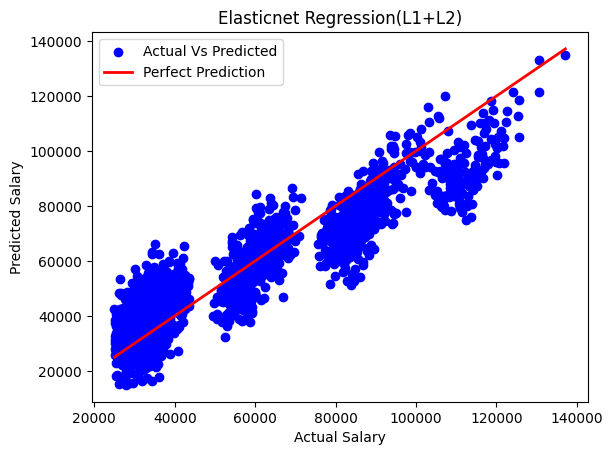

In [ ]:
plt.scatter(x = y_test,y = EN_predict_x_test, color = "blue", label = "Actual Vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title("Elasticnet Regression(L1+L2)")
plt.legend()
plt.show()

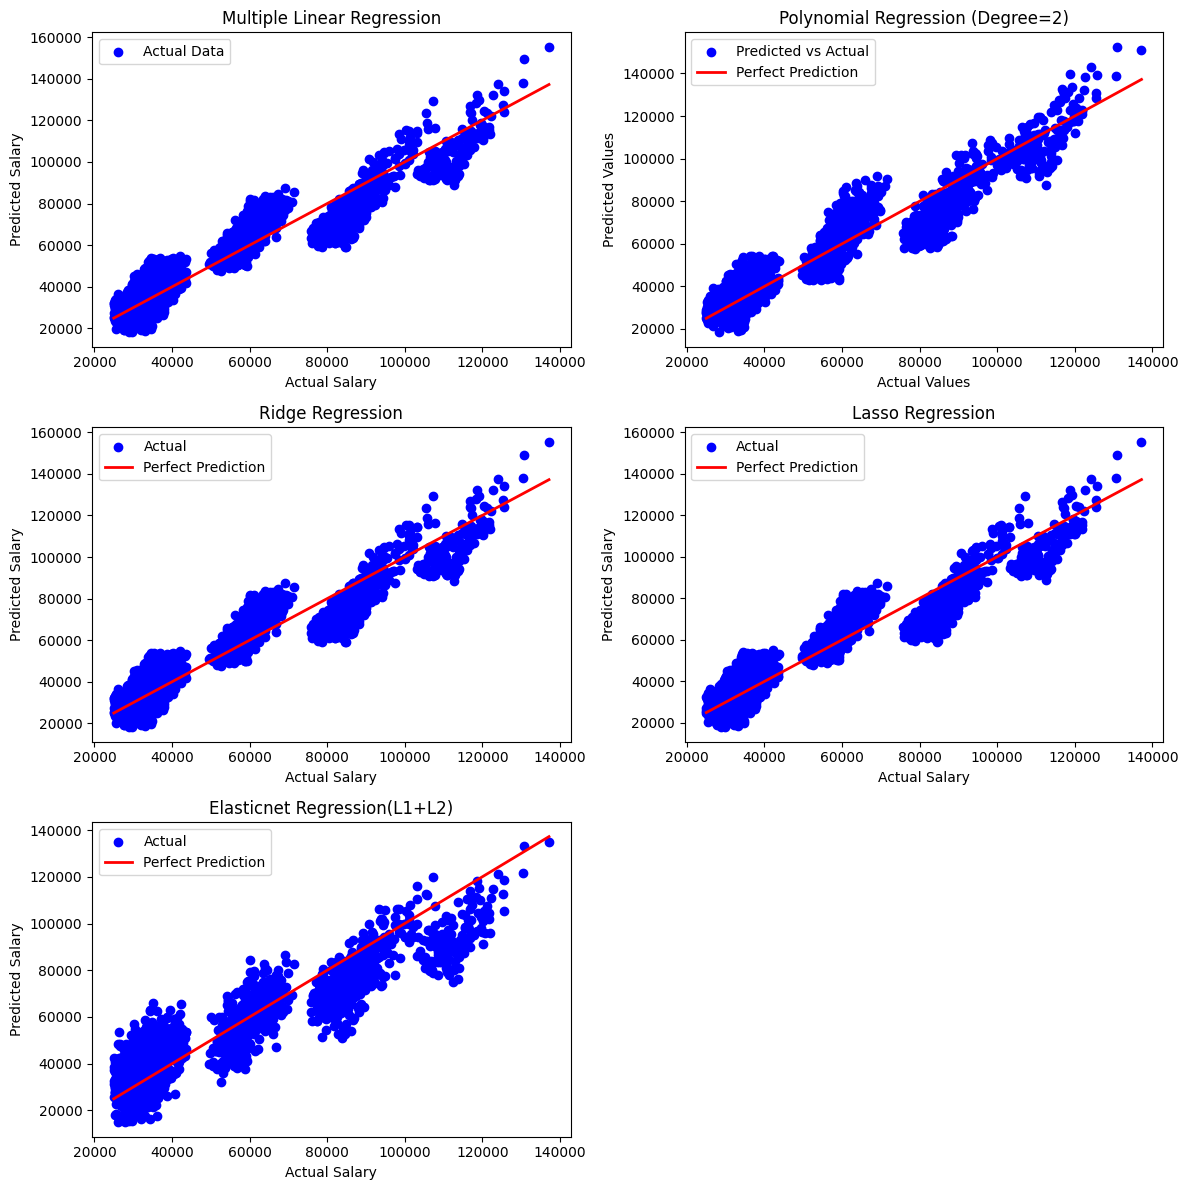

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.scatter(y_test, y_pred_lr_test, color='blue', label='Actual Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Multiple Linear Regression')
plt.legend()

plt.subplot(3,2,2)
plt.scatter(y_test, y_pred_poly_test, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression (Degree=2)')
plt.legend()

plt.subplot(3,2,3)
plt.scatter(y_test,r_predict_x_test, color = "blue", label = "Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Ridge Regression')
plt.legend()

plt.subplot(3,2,4)
plt.scatter(x = y_test,y = lasso_predict_x_test, color = "blue", label = "Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Lasso Regression')
plt.legend()

plt.subplot(3,2,5)
plt.scatter(x = y_test,y = EN_predict_x_test, color = "blue", label = "Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title("Elasticnet Regression(L1+L2)")
plt.legend()

plt.tight_layout()
plt.show()

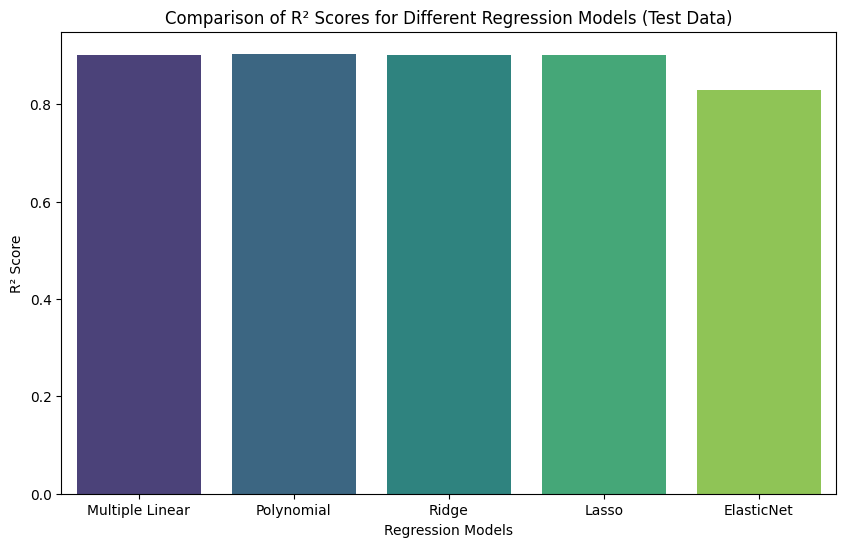

In [ ]:
models = ["Multiple Linear", "Polynomial", "Ridge", "Lasso", "ElasticNet"]

scores = [r2_score_test, r2_score_poly_test, r2_score_rid_test, r2_score_lasso_test, r2_score_EN_test]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=scores, palette="viridis")

plt.title("Comparison of R² Scores for Different Regression Models (Test Data)")
plt.xlabel("Regression Models")
plt.ylabel("R² Score")

plt.show()


In [ ]:
import pandas as pd

data = {
    'Model': ['Multiple Linear Regression',
              'Polynomial Regression',
              'Lasso Regression',
              'Ridge Regression',
              'ElasticNet Regression'],

    # Training metrics
    'Train MSE': [MSE_lr_train, MSE_poly_train, MSE_lasso_train, MSE_rid_train, MSE_EN_train],
    'Train RMSE': [RMSE_lr_train, RMSE_poly_train, RMSE_lasso_train, RMSE_rid_train, RMSE_EN_train],
    'Train MAE': [MAE_lr_train, MAE_poly_train, MAE_lasso_train, MAE_rid_train, MAE_EN_train],
    'Train R2 Score': [r2_score_train, r2_score_poly_train, r2_score_lasso_train, r2_score_rid_train, r2_score_EN_train],
}

data_test = {
    'Model': ['Multiple Linear Regression',
              'Polynomial Regression',
              'Lasso Regression',
              'Ridge Regression',
              'ElasticNet Regression'],

    'Test MSE': [MSE_lr_test, MSE_poly_test, MSE_lasso_test, MSE_rid_test, MSE_EN_test],
    'Test RMSE': [RMSE_lr_test, RMSE_poly_test, RMSE_lasso_test, RMSE_rid_test, RMSE_EN_test],
    'Test MAE': [MAE_lr_test, MAE_poly_test, MAE_lasso_test, MAE_rid_test, MAE_EN_test],
    'Test R2 Score': [r2_score_test, r2_score_poly_test, r2_score_lasso_test, r2_score_rid_test, r2_score_EN_test],
}

summary_df = pd.DataFrame(data)
summary_df_test = pd.DataFrame(data_test)

summary_df.head()

,Model,Train MSE,Train RMSE,Train MAE,Train R2 Score
0,Multiple Linear Regression,6.695605e+07,8182.667529,6522.829540,0.902726
1,Polynomial Regression,5.473789e+07,7398.506253,5720.936646,0.920477
2,Lasso Regression,6.700039e+07,8185.376550,6526.347471,0.902662
3,Ridge Regression,6.696898e+07,8183.457428,6521.865121,0.902707
4,ElasticNet Regression,1.169480e+08,10814.249043,8628.308115,0.830098


In [ ]:
summary_df_test.head()

,Model,Test MSE,Test RMSE,Test MAE,Test R2 Score
0,Multiple Linear Regression,7.050426e+07,8396.681238,6738.149992,0.900126
1,Polynomial Regression,6.816797e+07,8256.389829,6408.494836,0.903435
2,Lasso Regression,7.035129e+07,8387.567418,6732.149011,0.900343
3,Ridge Regression,7.042908e+07,8392.203791,6733.093103,0.900232
4,ElasticNet Regression,1.214457e+08,11020.240582,8797.026954,0.827964


Model Prediction for New Employee Profile

In [ ]:
Age = 21
Gender = "Female"
Designation = "Junior"
ExperienceYears = 0
ProductivityScore = 65
EducationLevel = "Bachelor"
PerformanceRating = 4
LastPromotionYear = 2022
WorkLocation = "Delhi"
Department = "Finance"
Skillset = ["Finance", "Excel"]

# Transform
# Gender Val
gender_val = {"male": 1, "female": 0}[Gender.strip().lower()]

# Designation and EducationLevel (OrdinalEncoder)
des_edu_val = oe.transform([[Designation, EducationLevel]])[0].astype(int)

# WorkLocation + Department (OneHotEncoder)
work_dept_val = oh.transform([[WorkLocation, Department]])[0]

# Skillset (MultiLabelBinarizer)
skills_val = mlb.transform([Skillset])[0]

# Follow your training column order strictly
final_features = np.concatenate([
    [Age, gender_val, des_edu_val[0], ExperienceYears, ProductivityScore,
     des_edu_val[1], PerformanceRating, LastPromotionYear],
    work_dept_val,
    skills_val
]).reshape(1, -1)

print("Final feature count:", final_features.shape)

x_test_poly_transform = pl.transform(final_features)

prediction = lr.predict(final_features)
prediction_poly = poly.predict(x_test_poly_transform)
prediction_Ridge = R.predict(final_features)
prediction_Lasso = lasso_cv.predict(final_features)
prediction_Elasti = EN.predict(final_features)

print(f"Predicted Value Linear: {prediction[0]:.2f}")
print(f"Predicted Value Polynomial: {prediction_poly[0]:.2f}")
print(f"Predicted Value Ridge: {prediction_Ridge[0]:.2f}")
print(f"Predicted Value Lasso: {prediction_Lasso[0]:.2f}")
print(f"Predicted Value Elastinet: {prediction_Elasti[0]:.2f}")

Final feature count: (1, 40)
Predicted Value Linear: 26284.15
Predicted Value Polynomial: 28106.36
Predicted Value Ridge: 26324.81
Predicted Value Lasso: 26256.13
Predicted Value Elastinet: 34019.56


6) Cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, x_train, y_train, scoring='r2', cv=15)
print(scores)
print("Mean R2:", scores.mean())

[0.89767852 0.89130206 0.90224125 0.9032382  0.89679126 0.89432592
 0.90106888 0.90421869 0.89847989 0.90570946 0.90299827 0.89735896
 0.89993568 0.91099665 0.91415092]
Mean R2: 0.901366308659276


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_r = DecisionTreeRegressor()

dt_r.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_test_pred = dt_r.predict(x_test)
y_train_pred = dt_r.predict(x_train)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

1.0
0.9758848667157649


In [ ]:
print("Model expects:", dt_r.get_params)
print("Provided names:", len(x_train.columns))

Model expects: <bound method BaseEstimator.get_params of DecisionTreeRegressor()>
Provided names: 40


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# plt.figure(figsize=(100, 50))

# plot_tree(
#     dt_r,
#     feature_names=x_train.columns,   # feature names
#     filled=True,                      # color nodes
#     rounded=True,                     # rounded boxes
#     fontsize=20                       # readable text
# )

# plt.title("Decision Tree Visualization", fontsize=60, fontweight='bold')
# plt.show()


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_DT = {
#     "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#     'max_depth': [3, 5, 7, 10, 12],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# gd = GridSearchCV(
#     estimator=DecisionTreeRegressor(),
#     param_grid=param_DT,
#     cv=5,
#     scoring=r2_score,
#     n_jobs= -1
#     )

# gd.fit(x_train,y_train)

# print(gd.best_estimator_)

In [ ]:
# y_train_pr = gd.predict(x_train)
# y_test_pr = gd.predict(x_test)

# print(r2_score(y_train,y_train_pr))
# print(r2_score(y_test,y_test_pr))

# **Classification : Suggest suitable roles or Designation**

In [ ]:
df.head()

,Age,Gender,Designation,ExperienceYears,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,...,Finance,Java,Logistics,Marketing,Negotiation,Project Management,Python,Recruitment,SEO,SQL
0,31,1,2,9,81456.0,81,1,1,5,2025,...,0,0,0,0,0,0,0,0,1,0
1,27,1,1,3,32873.0,47,1,0,3,2022,...,0,0,1,0,0,0,0,0,0,0
2,35,0,0,1,29327.0,72,2,0,4,2024,...,0,0,0,1,0,0,0,0,0,0
3,32,0,0,2,37359.0,56,1,1,3,2023,...,0,0,0,1,0,0,0,0,1,0
4,29,0,2,8,83556.0,88,1,0,5,2024,...,1,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.feature_selection import SelectKBest, f_classif

# Keep X_classi as the original DataFrame
X_classi_df = df.drop(columns=["Designation"])
y_classi = df["Designation"]

selector = SelectKBest(score_func=f_classif, k=6)
X_new = selector.fit_transform(X_classi_df, y_classi)

# Get top 3 feature names using the original DataFrame
top_3_features = X_classi_df.columns[selector.get_support()].tolist()
print("Top 3 selected features using f_classif:", top_3_features)

Top 3 selected features using f_classif: ['Age', 'ExperienceYears', 'Salary', 'ProductivityScore', 'PerformanceRating', 'LastPromotionYear']


In [ ]:
# Taking the top 3 features
X = df[['Age', 'ExperienceYears', 'Salary', 'ProductivityScore', 'PerformanceRating', 'LastPromotionYear']]
Y = df["Designation"]

# Train_Test Splitting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X_classi_df,y_classi,test_size=0.2,random_state=42)

1) Decision Tree

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.7265

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       562
           1       0.49      0.52      0.50       531
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       403
           4       1.00      0.99      1.00       139

    accuracy                           0.73      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.73      0.73      0.73      2000



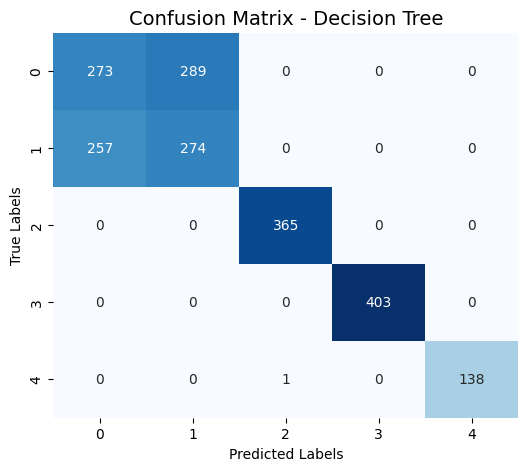

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Train Decision Tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train, Y_train)

Y_train_pred_dt1 = dt.predict(X_train)
Y_test_pred_dt1 = dt.predict(X_test)

# Accuracy
train_acc_dt1 = accuracy_score(Y_train, Y_train_pred_dt1)
test_acc_dt1 = accuracy_score(Y_test, Y_test_pred_dt1)

print(f"Decision Tree Training Accuracy: {train_acc_dt1}")
print(f"Decision Tree Testing Accuracy: {test_acc_dt1}\n")

# Classification report for test set
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_dt1))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_dt1)

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Decision Tree", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) Training Accuracy ~ 99.94% - The model learned almost perfectly on the training data.
Testing Accuracy ~ 70.89% - Performance on unseen data is significantly lower.
This is a classic case of **overfitting**.

2) **Classes 0 & 1:** Poor precision and recall; the model struggles, likely due to overlap or being majority classes.
**Classes 2, 3 & 4:** Excellent performance;**Macro vs Weighted Avg:** Macro avg (0.80) shows average per-class performance, while weighted avg (0.71) drops because poor performance on the majority classes 0 & 1 lowers overall accuracy.

**2) Decision Tree (Hyperparametr tunning)**

Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Training Accuracy: 0.7415
Decision Tree Testing Accuracy: 0.74

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.53      0.76      0.62       562
           1       0.52      0.28      0.36       531
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       403
           4       1.00      1.00      1.00       139

    accuracy                           0.74      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.74      0.74      0.72      2000



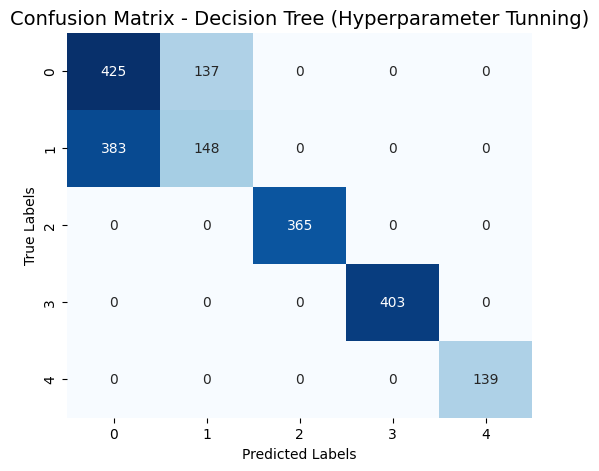

In [118]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search with 5-fold CV
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt.fit(X_train, Y_train)

print("Best Parameters:", grid_dt.best_params_)

# Predictions
Y_train_pred_dt2 = grid_dt.predict(X_train)
Y_test_pred_dt2 = grid_dt.predict(X_test)

train_acc_dt2 = accuracy_score(Y_train, Y_train_pred_dt2)
test_acc_dt2 = accuracy_score(Y_test, Y_test_pred_dt2)

# Accuracy
print(f"Decision Tree Training Accuracy: {train_acc_dt2}")
print(f"Decision Tree Testing Accuracy: {test_acc_dt2}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_dt2))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_dt2 )

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Decision Tree (Hyperparameter Tunning)", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) **Training vs Testing Accuracy:** 72.68% vs 69.76% - slight overfitting, better than untuned tree.

2) **Classes 0 & 1:** Low precision/recall → struggles with majority/overlapping classes.
**Classes 2, 3 & 4:** Near-perfect predictions → easier to separate or smaller classes.
**Macro avg (80%) vs Weighted avg (72%): **Majority classes lower weighted accuracy.

In [107]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [108]:
def objective(trial):

    cri = trial.suggest_categorical(
        'criterion', ['gini', 'entropy', 'log_loss']
    )
    max_depth = trial.suggest_int('max_depth', 3, 12)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
   

    dt = DecisionTreeClassifier(
        criterion=cri,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        random_state=42
    )

    score = cross_val_score(
        dt, X_train, Y_train, cv=5, scoring='accuracy'
    ).mean()

    return score


In [109]:

study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler()
)

study.optimize(objective, n_trials=100)

[I 2026-01-05 01:06:06,927] A new study created in memory with name: no-name-94b8518a-b793-44a6-80d3-654e16fad394
[I 2026-01-05 01:06:07,001] Trial 0 finished with value: 0.70475 and parameters: {'criterion': 'log_loss', 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.70475.
[I 2026-01-05 01:06:07,094] Trial 1 finished with value: 0.7046250000000001 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.70475.
[I 2026-01-05 01:06:07,203] Trial 2 finished with value: 0.710875 and parameters: {'criterion': 'log_loss', 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.710875.
[I 2026-01-05 01:06:07,311] Trial 3 finished with value: 0.711625 and parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.711625.
[I 2026-01-05 01:06:07,407] Trial 4 finished 

In [113]:
print(study.best_trial.value)
print(study.best_trial.params)

0.712125
{'criterion': 'log_loss', 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}


In [115]:
best_DT = DecisionTreeClassifier(**study.best_trial.params,random_state=42)

best_DT.fit(X_train,Y_train)

print(accuracy_score(best_DT.predict(X_train),Y_train))
print(accuracy_score(best_DT.predict(X_test),Y_test))

0.73075
0.718


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.52      0.67      0.59       562
           1       0.50      0.36      0.42       531
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       403
           4       1.00      1.00      1.00       139

    accuracy                           0.73      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.73      0.73      0.73      2000



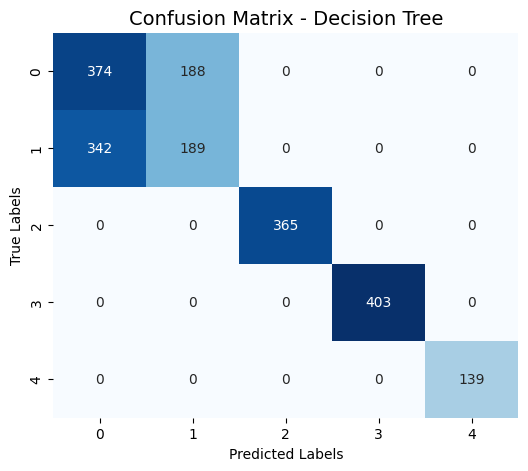

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


print("Classification Report (Test Set):")
print(classification_report(Y_test, best_DT.predict(X_test)))

# Confusion Matrix
cm = confusion_matrix(Y_test,best_DT.predict(X_test))

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Decision Tree", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# feature_names = ['Age', 'ExperienceYears', 'Salary', 'ProductivityScore', 'PerformanceRating', 'LastPromotionYear']
# from sklearn.tree import plot_tree
# plt.figure(figsize=(100,50))
# plot_tree(
#     grid_dt.best_estimator_,
#     feature_names=feature_names,
#     filled=True,
#     rounded=True,
#     class_names=[str(i) for i in range(len(set(Y_train.values.ravel())))],
#     fontsize=40
# )
# plt.title("Decision Tree Visualization", fontsize=80, fontweight='bold')
# plt.show()

## Voting Ensembel

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR

In [ ]:
lr = LinearRegression()
dt_r = DecisionTreeRegressor()
lass_r = Lasso()

In [ ]:
estimator_regressor = [('lr',lr),('dt',dt_r),('la',lass_r)]

In [ ]:
for estimator in estimator_regressor:
    print(estimator,estimator[1])
    scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
    print(estimator[0],np.round(np.mean(scores),2))

('lr', LinearRegression()) LinearRegression()
lr 1.0
('dt', DecisionTreeRegressor()) DecisionTreeRegressor()
dt 1.0
('la', Lasso()) Lasso()
la 1.0


In [ ]:
vote_r = VotingRegressor(estimators=estimator_regressor)

vote_r.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()), ('la', Lasso())])

In [ ]:
print(r2_score(vote_r.predict(x_train),y_train))
print(r2_score(vote_r.predict(x_test),y_test))

0.9526741436044659
0.9414370408773215


In [ ]:
# for i in range(1,4):
#     for j in range(1,4):
#         for k in range(1,4):
#             vote_r_w = VotingRegressor(estimators=estimator_regressor,weights=[i,j,k])
#             scores = cross_val_score(vote_r_w,x_train,y_train,scoring='r2',cv=10)
#             print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))

For i=1,j=1,k=1 0.95
For i=1,j=1,k=2 0.94
For i=1,j=1,k=3 0.93
For i=1,j=2,k=1 0.96
For i=1,j=2,k=2 0.95
For i=1,j=2,k=3 0.95


KeyboardInterrupt: 

In [ ]:
vot_w = VotingRegressor(estimators=estimator_regressor,weights=[1,3,1])

vot_w.fit(x_train,y_train)

print(r2_score(y_train,vot_w.predict(x_train)))
print(r2_score(y_test,vot_w.predict(x_test)))

0.9844361392888212
0.9694417212418394


In [ ]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=2)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

estimators_dt = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

for estimator in estimators_dt:
  scores = cross_val_score(estimator[1],x_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

dt1 0.93
dt2 0.98
dt3 0.99
dt4 0.99
dt5 0.98


In [ ]:
vr = VotingRegressor(estimators_dt)

vr.fit(x_train,y_train)

print("Voting Regressor",r2_score(vr.predict(x_train),y_train))
print("Voting Regressor",r2_score(vr.predict(x_test),y_test))

Voting Regressor 0.9888118177185091
Voting Regressor 0.9835296113442167


In [ ]:
for i in (1,4):
    for j in range(1,4):
        for k in range(1,4):
            for l in range(1,4):
                for m in range(1,4):
                    vot = VotingRegressor(estimators_dt,weights=[i,j,k,l,m])
                    scores = cross_val_score(vot,x_train,y_train,scoring="r2",cv=10)
                    print(f"{i},{j},{k}:",np.mean(scores))

1,1,1: 0.9840054452605678
1,1,1: 0.9842395798262741
1,1,1: 0.9839896251133637
1,1,1: 0.9851139500409396
1,1,1: 0.9851168716502545
1,1,1: 0.9848907859740793
1,1,1: 0.9857795341610347
1,1,1: 0.9857062818530489
1,1,1: 0.9854464559500785
1,1,2: 0.9851745682879356
1,1,2: 0.9851450471264874
1,1,2: 0.9849220293486673
1,1,2: 0.9858338854106847
1,1,2: 0.9857388421388533
1,1,2: 0.9854306280036971
1,1,2: 0.9862395510319095
1,1,2: 0.9861352418308786
1,1,2: 0.9858784311445188
1,1,3: 0.9858413960151218
1,1,3: 0.9857822792006988
1,1,3: 0.9855356466815849


KeyboardInterrupt: 

In [ ]:
# scores = cross_val_score(vote_r,x_train,y_train,scoring='r2',cv=10)
# print("Voting Regressor",np.round(np.mean(scores),2))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()

In [ ]:
class_model = [('cl1',clf1),('cl2',clf2),('cl3',clf3)]

for estimator in class_model:
    scores = cross_val_score(estimator[1],X_train,Y_train,scoring="accuracy",cv=5)
    print(estimator[1]," : ",np.round(np.mean(scores),4))

LogisticRegression()  :  0.7129
DecisionTreeClassifier()  :  0.7168
KNeighborsClassifier()  :  0.7046


In [ ]:
vote_c = VotingClassifier(estimators = class_model)

vote_c.fit(X_train,Y_train)

print(accuracy_score(vote_c.predict(X_train),Y_train))
print(accuracy_score(vote_c.predict(X_test),Y_test))

0.906625
0.7225


In [ ]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vote_class = VotingClassifier(estimators=class_model,weights=[i,j,k])
            scores = cross_val_score(vote_class,X_train,Y_train,scoring="accuracy",cv=10)
            print(f"{i},{j},{k} : ",np.round(np.mean(scores),3))

1,1,1 :  0.706
1,1,2 :  0.709
1,1,3 :  0.707
1,2,1 :  0.706
1,2,2 :  0.704
1,2,3 :  0.705
1,3,1 :  0.715
1,3,2 :  0.707


KeyboardInterrupt: 

In [ ]:
vote_c = VotingClassifier(estimators = class_model,weights=[3,1,1])

vote_c.fit(X_train,Y_train)

print(accuracy_score(vote_c.predict(X_train),Y_train))
print(accuracy_score(vote_c.predict(X_test),Y_test))

0.7185
0.717


In [ ]:
dt1 = DecisionTreeClassifier(max_depth=3)
dt2 = DecisionTreeClassifier(max_depth=5)
dt3 = DecisionTreeClassifier(max_depth=7)
dt4 = DecisionTreeClassifier(max_depth=9)
dt5 = DecisionTreeClassifier(max_depth=None)

class_model_dt = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

for estimator in class_model_dt:
    score = cross_val_score(estimator[1],X_train,Y_train,scoring="accuracy",cv=10)
    print(estimator[0],np.round(np.mean(score),4))
    

dt1 0.703
dt2 0.7068
dt3 0.708
dt4 0.7036
dt5 0.7119


In [ ]:
vot_c = VotingClassifier(estimators=class_model_dt)

vot_c.fit(X_train,Y_train)

print(accuracy_score(vot_c.predict(X_train),Y_train))
print(accuracy_score(vot_c.predict(X_test),Y_test))

0.922875
0.7255


## Bagging

In [62]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [64]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:

knn.fit(x_train,y_train)

KNeighborsRegressor()

In [66]:
lr.fit(x_train,y_train)


LinearRegression()

In [67]:
print(r2_score(y_test,lr.predict(x_test)))
print(r2_score(y_test,dt.predict(x_test)))
print(r2_score(y_test,knn.predict(x_test)))

0.9001258729326045
0.9759591795076823
0.9320540486205756


In [68]:
bg_r = BaggingRegressor()
bg_r.fit(x_train,y_train)

print(r2_score(y_train,bg_r.predict(x_train)))
print(r2_score(y_test,bg_r.predict(x_test)))

0.9975500911154015
0.9860527224061502


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'estimator': [DecisionTreeRegressor(),LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}


cv = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=4),param_grid=params,cv=3,n_jobs=4,verbose=1)

cv.fit(x_train,y_train)

print(r2_score(y_train,cv.predict(x_train)))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
0.995300092551695


In [74]:
print(cv.best_estimator_)
print(cv.best_params_)
print(cv.best_score_)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=0.5,
                 n_estimators=100, n_jobs=4, random_state=1)
{'bootstrap': True, 'bootstrap_features': False, 'estimator': DecisionTreeRegressor(), 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
0.9872245486788128


In [75]:
print(r2_score(y_test,cv.predict(x_test)))

0.9873941595747583


In [90]:
# import optuna
# def objectiv(trial):

#     est = trial.suggest_categorical(
#         'estimator', [DecisionTreeRegressor(),LinearRegression(), KNeighborsRegressor()]
#     )

#     n_est = trial.suggest_int('n_estimators',5,40)

#     m_sample = trial.suggest_int('max_samples',0.2,1)

#     m_feature = trial.suggest_int("max_features",0.2,1)
    
#     boot = trial.suggest_categorical(
#         "bootstrap",[True,False]
#     )
    
#     boot_f = trial.suggest_categorical(
#         "bootstrap_features",[True,False]
#     )

#     bg = BaggingRegressor(
#         estimator = est,
#         n_estimators = n_est,
#         max_sample = m_sample,
#         max_features = m_feature,
#         bootstrap = boot,
#         bootstrap_features = boot_f 
#     )
    
#     cv = cross_val_score(bg,x_train,y_train,cv = 5,scoring="r2")

#     print(f"{est,n_est,m_sample,m_feature,boot,boot_f} : ",np.round(np.mean(cv),4))

    
    

In [101]:
import optuna
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):

    est_name = trial.suggest_categorical(
        "estimator", ["dt", "knn"]
    )

    if est_name == "dt":
        estimator = DecisionTreeRegressor(random_state=1)
    else:
        estimator = KNeighborsRegressor()

    n_estimators = trial.suggest_int("n_estimators", 10, 60)

    max_samples = trial.suggest_float("max_samples", 0.2, 1.0)

    max_features = trial.suggest_float("max_features", 0.2, 1.0)

    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    bootstrap_features = trial.suggest_categorical(
        "bootstrap_features", [True, False]
    )

    bg = BaggingRegressor(
        estimator=estimator,
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        bootstrap=bootstrap,
        bootstrap_features=bootstrap_features,
        random_state=1,
        n_jobs=-1
    )

    scores = cross_val_score(bg, x_train, y_train, cv=5, scoring="r2")

    return np.mean(scores)   # ✅ MUST return float


In [102]:
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)


[I 2026-01-05 01:00:21,766] A new study created in memory with name: no-name-7d895464-cc4b-4247-b769-8785ac562a60
[I 2026-01-05 01:00:24,357] Trial 0 finished with value: 0.9292084191310881 and parameters: {'estimator': 'knn', 'n_estimators': 18, 'max_samples': 0.4409133712503116, 'max_features': 0.82620253285439, 'bootstrap': False, 'bootstrap_features': False}. Best is trial 0 with value: 0.9292084191310881.
[I 2026-01-05 01:00:25,978] Trial 1 finished with value: 0.8664063788851667 and parameters: {'estimator': 'knn', 'n_estimators': 10, 'max_samples': 0.4462733509789038, 'max_features': 0.24403662181648517, 'bootstrap': False, 'bootstrap_features': True}. Best is trial 0 with value: 0.9292084191310881.
[I 2026-01-05 01:00:30,897] Trial 2 finished with value: 0.9066859822570337 and parameters: {'estimator': 'knn', 'n_estimators': 50, 'max_samples': 0.29754287169648014, 'max_features': 0.5473204472165634, 'bootstrap': False, 'bootstrap_features': False}. Best is trial 0 with value: 0

In [103]:
print(study.best_trial.values)
print(study.best_trial.params)

[0.9861791926339485]
{'estimator': 'dt', 'n_estimators': 46, 'max_samples': 0.47017924666914745, 'max_features': 0.959845983288294, 'bootstrap': True, 'bootstrap_features': False}


In [119]:
dt = DecisionTreeClassifier(
    criterion ='gini', 
    max_depth = 12, 
    max_features= None, 
    min_samples_leaf=4, 
    min_samples_split = 2
)

dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=4)

In [120]:
print(accuracy_score(Y_train,dt.predict(X_train)))
print(accuracy_score(Y_test,dt.predict(X_test)))

0.741875
0.738


In [122]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(
    estimator = dt,
    n_estimators = 50,
    max_samples=0.5,
    max_features=0.2,
    bootstrap= True,
    bootstrap_features=True
)

bg.fit(X_train,Y_train)

BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(max_depth=12,
                                                   min_samples_leaf=4),
                  max_features=0.2, max_samples=0.5, n_estimators=50)

In [124]:
print(accuracy_score(Y_train,bg.predict(X_train)))
print(accuracy_score(Y_test,bg.predict(X_test)))

0.862375
0.7195


In [149]:
import optuna
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):

    est_name = trial.suggest_categorical(
        "estimator", ["dt"]
    )

    if est_name == "dt":
        estimator = DecisionTreeClassifier(random_state=1)

    n_estimators = trial.suggest_int("n_estimators", 10, 30)

    max_samples = trial.suggest_float("max_samples", 0.2, 1.0)

    max_features = trial.suggest_float("max_features", 0.2, 1.0)

    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    bootstrap_features = trial.suggest_categorical(
        "bootstrap_features", [True, False]
    )

    bg = BaggingClassifier(
    estimator = estimator,
    n_estimators = n_estimators,
    max_samples = max_samples,
    max_features = max_features,
    bootstrap= bootstrap,
    bootstrap_features = bootstrap_features,
    random_state=1,
    n_jobs=-1
    )

    scores = cross_val_score(bg, x_train, y_train, cv=3, scoring="accuracy")

    return np.mean(scores)   # ✅ MUST return float


In [150]:
study = optuna.create_study(direction = "maximize",sampler = optuna.samplers.TPESampler())
study.optimize(objective,n_trials=50)

[I 2026-01-05 01:33:31,470] A new study created in memory with name: no-name-5c924c59-18f2-48b8-8b00-953ebd817508
[I 2026-01-05 01:34:11,887] Trial 0 finished with value: 0.0 and parameters: {'estimator': 'dt', 'n_estimators': 26, 'max_samples': 0.22690096460635711, 'max_features': 0.6424060613769523, 'bootstrap': False, 'bootstrap_features': False}. Best is trial 0 with value: 0.0.
[I 2026-01-05 01:34:36,359] Trial 1 finished with value: 0.0003749531308586427 and parameters: {'estimator': 'dt', 'n_estimators': 13, 'max_samples': 0.2582940737824488, 'max_features': 0.9224489929291788, 'bootstrap': True, 'bootstrap_features': False}. Best is trial 1 with value: 0.0003749531308586427.
[I 2026-01-05 01:35:06,947] Trial 2 finished with value: 0.0 and parameters: {'estimator': 'dt', 'n_estimators': 19, 'max_samples': 0.2420457497263695, 'max_features': 0.7169926698960232, 'bootstrap': False, 'bootstrap_features': True}. Best is trial 1 with value: 0.0003749531308586427.
[I 2026-01-05 01:35:

KeyboardInterrupt: 

In [152]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Base estimator (best for bagging)


# Parameter grid
param_grid = {
    "n_estimators": [10, 20, 30],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

# Bagging model
bg = BaggingClassifier(
    estimator=dt,
    random_state=1,
    n_jobs=-1
)

# GridSearchCV
grid = GridSearchCV(
    estimator=bg,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

# Fit
grid.fit(X_train, Y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 30}
Best CV Accuracy: 0.71325


In [ ]:
print(study.best_trial.values)
print(study.best_trial.params)

## Adaboost

In [154]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

AD_r = AdaBoostRegressor(n_estimators=1500,learning_rate=0.1)

AD_r.fit(x_train,y_train)

print(r2_score(y_train,AD_r.predict(x_train)))
print(r2_score(y_test,AD_r.predict(x_test)))

0.9845546251302735
0.9845721255298158


In [156]:
AD_r = AdaBoostClassifier(n_estimators=1500,learning_rate=0.5)

AD_r.fit(X_train,Y_train)

print(r2_score(Y_train,AD_r.predict(X_train)))
print(r2_score(Y_test,AD_r.predict(X_test)))

0.6621817931710379
0.666938549396353


In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Base estimator (weak learner)
base_est = DecisionTreeClassifier(max_depth=1, random_state=1)

# AdaBoost model
ada = AdaBoostClassifier(
    estimator=base_est,
    random_state=1
)

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 300, 500, 800, 1200],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",   # classification metric
    n_jobs=-1,
    verbose=1
)

# Fit
grid.fit(X_train, Y_train)

# Best results
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best CV Accuracy: 0.651375


In [161]:
# XGBoost Classification Example

from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# Model
model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train
model.fit(X_train, Y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(Y_train, model.predict(X_train)))
print("Accuracy:", accuracy_score(Y_test, y_pred))



Accuracy: 0.997875
Accuracy: 0.7295


In [169]:
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200,1500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "max_depth": trial.suggest_int("max_depth", 1, 6),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)

    scores = cross_val_score(
        model,
        X_train,
        Y_train,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    return np.mean(scores)   # ✅ must return float


In [170]:
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler()
)

study.optimize(objective, n_trials=50)


[I 2026-01-05 02:03:05,285] A new study created in memory with name: no-name-d16661e6-d739-4f9a-807c-9cf133ec1c4e
[I 2026-01-05 02:03:06,366] Trial 0 finished with value: 0.70525 and parameters: {'n_estimators': 200, 'learning_rate': 0.2378472582556535, 'max_depth': 1, 'subsample': 0.8233955467834557, 'colsample_bytree': 0.6505683055160683, 'gamma': 0.3260261877140497, 'min_child_weight': 10}. Best is trial 0 with value: 0.70525.
[I 2026-01-05 02:03:07,192] Trial 1 finished with value: 0.7031249999999999 and parameters: {'n_estimators': 200, 'learning_rate': 0.0971415851950861, 'max_depth': 3, 'subsample': 0.7567429893437218, 'colsample_bytree': 0.9249942172669967, 'gamma': 1.1400040166080727, 'min_child_weight': 3}. Best is trial 0 with value: 0.70525.
[I 2026-01-05 02:03:07,910] Trial 2 finished with value: 0.703 and parameters: {'n_estimators': 200, 'learning_rate': 0.2588896307788602, 'max_depth': 4, 'subsample': 0.8683961261812243, 'colsample_bytree': 0.9219637130217297, 'gamma': 

In [171]:
print(study.best_trial.params)
print(study.best_trial.value)

{'n_estimators': 200, 'learning_rate': 0.4240868867227989, 'max_depth': 4, 'subsample': 0.9196307291284364, 'colsample_bytree': 0.6302730087234676, 'gamma': 3.614664170932222, 'min_child_weight': 1}
0.714125


## Logistic

In [ ]:
lo = LogisticRegression()

lo.fit(X_train,Y_train)

print(accuracy_score(lo.predict(X_train),Y_train))

0.7185


In [ ]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


###### Decision Tree (Max_Depth = 5 )

**3) Random Forest**

Random Forest Training Accuracy: 0.8633028896541398
Random Forest Testing Accuracy: 0.7107784431137725

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       472
           1       0.51      0.49      0.50       487
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00       332
           4       0.99      1.00      1.00       110

    accuracy                           0.71      1670
   macro avg       0.80      0.80      0.80      1670
weighted avg       0.71      0.71      0.71      1670



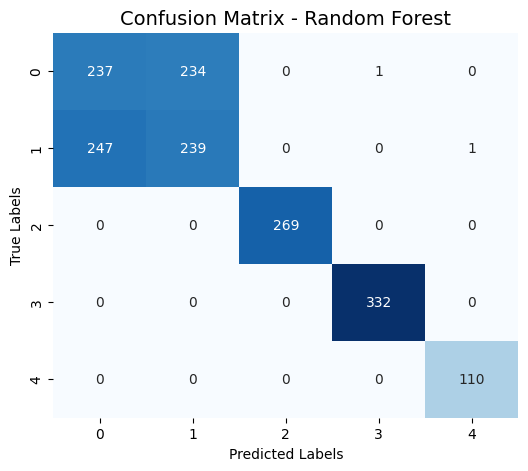

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

# Train Random Forest
rf_best = RandomForestClassifier(n_estimators=400,max_depth=10,min_samples_split=5,min_samples_leaf=2,random_state=42)
rf_best.fit(X_train, Y_train)

Y_train_pred_rf1 = rf_best.predict(X_train)
Y_test_pred_rf1 = rf_best.predict(X_test)

# Accuracy
train_acc_rf1 = accuracy_score(Y_train, Y_train_pred_rf1)
test_acc_rf1 = accuracy_score(Y_test, Y_test_pred_rf1)

print(f"Random Forest Training Accuracy: {train_acc_rf1}")
print(f"Random Forest Testing Accuracy: {test_acc_rf1}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_rf1))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_rf1 )

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1)**Training vs Testing Accuracy:** 86.33% vs 71% → strong overfitting.

2)**Classes 0 & 1:** Low precision/recall - struggles with majority/
overlapping classes.
**Classes 2, 3 & 4:** Near-perfect - smaller or distinct classes predicted well.
*Macro avg (80%) vs Weighted avg (71%)* - poor performance on majority classes lowers overall accuracy.

**4) SVM**

SVM Training Accuracy: 0.7111843090282977
SVM Testing Accuracy: 0.7131736526946107

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       472
           1       0.51      1.00      0.67       487
           2       1.00      0.98      0.99       269
           3       0.99      1.00      1.00       332
           4       0.94      1.00      0.97       110

    accuracy                           0.71      1670
   macro avg       0.69      0.80      0.73      1670
weighted avg       0.57      0.71      0.62      1670



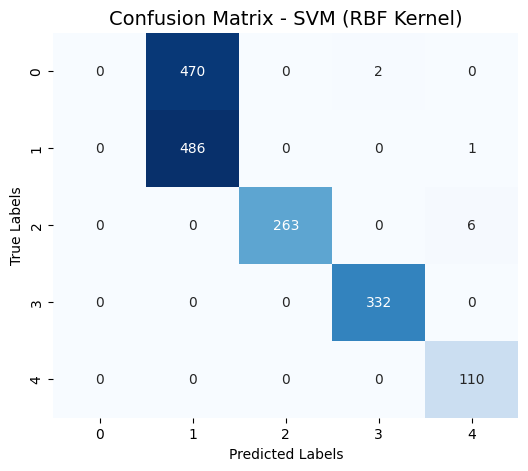

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = SVC(kernel='rbf',C=1.0)
clf.fit(X_train,Y_train)

Y_train_pred_clf1 = clf.predict(X_train)
Y_test_pred_clf1 = clf.predict(X_test)

# Accuracy
train_acc_clf1 = accuracy_score(Y_train, Y_train_pred_clf1)
test_acc_clf1 = accuracy_score(Y_test, Y_test_pred_clf1)

print(f"SVM Training Accuracy: {train_acc_clf1}")
print(f"SVM Testing Accuracy: {test_acc_clf1}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_clf1))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred_clf1)

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - SVM (RBF Kernel)", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) Training vs Testing Accuracy: 71.12% vs 71.31% → balanced generalization, no major overfitting.

2) Classes 0 & 1: Class 0 completely misclassified; Class 1 over-predicted with low precision but perfect recall. Classes 2, 3 & 4: near-perfect performance, well-separated data. Macro avg (80%) > Weighted avg (71%) → imbalance causes weaker overall accuracy.

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score


f1_weighted4 = f1_score(Y_test, Y_test_pred_clf1, average='weighted')
precision_score_weighted4 = precision_score(Y_test, Y_test_pred_clf1, average='weighted')
recall_weighted4 = recall_score(Y_test, Y_test_pred_clf1, average='weighted')

f1_weighted1 = f1_score(Y_test, Y_test_pred_dt1, average='weighted')
precision_score_weighted1 = precision_score(Y_test, Y_test_pred_dt1, average='weighted')
recall_weighted1 = recall_score(Y_test, Y_test_pred_dt1, average='weighted')

f1_weighted2 = f1_score(Y_test, Y_test_pred_dt2, average='weighted')
precision_score_weighted2 = precision_score(Y_test, Y_test_pred_dt2, average='weighted')
recall_weighted2 = recall_score(Y_test, Y_test_pred_dt2, average='weighted')

f1_weighted3 = f1_score(Y_test, Y_test_pred_rf1, average='weighted')
precision_score_weighted3 = precision_score(Y_test, Y_test_pred_rf1, average='weighted')
recall_weighted3 = recall_score(Y_test, Y_test_pred_rf1, average='weighted')



f1_weighted44 = f1_score(Y_train, Y_train_pred_clf1, average='weighted')
precision_score_weighted44 = precision_score(Y_train, Y_train_pred_clf1, average='weighted')
recall_weighted44 = recall_score(Y_train, Y_train_pred_clf1, average='weighted')

f1_weighted11 = f1_score(Y_train, Y_train_pred_dt1, average='weighted')
precision_score_weighted11 = precision_score(Y_train, Y_train_pred_dt1, average='weighted')
recall_weighted11 = recall_score(Y_train, Y_train_pred_dt1, average='weighted')

f1_weighted22 = f1_score(Y_train, Y_train_pred_dt2, average='weighted')
precision_score_weighted22 = precision_score(Y_train, Y_train_pred_dt2, average='weighted')
recall_weighted22 = recall_score(Y_train, Y_train_pred_dt2, average='weighted')

f1_weighted33 = f1_score(Y_train, Y_train_pred_rf1, average='weighted')
precision_score_weighted33 = precision_score(Y_train, Y_train_pred_rf1, average='weighted')
recall_weighted33 = recall_score(Y_train, Y_train_pred_rf1, average='weighted')

### **COMPARITIVE ANALYSIS OF CLASSIFICATION MODEL**

In [ ]:
data = {
    'Model': ['Decision Tree',
              'Decision Tree (Hyperparameter tunning)',
              'Random Forest',
              'SVM'],


    'Train Accuracy': [train_acc_dt1, train_acc_dt2, train_acc_rf1, train_acc_clf1],
    'Train F1': [f1_weighted11, f1_weighted22, f1_weighted33, f1_weighted44],
    'Train precision': [precision_score_weighted11, precision_score_weighted22, precision_score_weighted33, precision_score_weighted44],
    'Train Recall': [recall_weighted11, recall_weighted22, recall_weighted33, recall_weighted44],
}

data_test = {
    'Model': ['Decision Tree',
              'Decision Tree (Hyperparameter tunning)',
              'Random Forest',
              'SVM'],

    'Test Accuracy': [test_acc_dt1, test_acc_dt2, test_acc_rf1, test_acc_clf1],
    'Test F1': [f1_weighted1, f1_weighted2, f1_weighted3, f1_weighted4],
    'Test precision': [precision_score_weighted1, precision_score_weighted2, precision_score_weighted3, precision_score_weighted4],
    'Test Recall': [recall_weighted1, recall_weighted2, recall_weighted3, recall_weighted4],
}

summary_df = pd.DataFrame(data)
summary_df_test = pd.DataFrame(data_test)

summary_df

,Model,Train Accuracy,Train F1,Train precision,Train Recall
0,Decision Tree,0.999401,0.999401,0.999402,0.999401
1,Decision Tree (Hyperparameter tunning),0.724060,0.671228,0.738812,0.724060
2,Random Forest,0.863303,0.863125,0.863069,0.863303
3,SVM,0.711184,0.616219,0.567678,0.711184


In [ ]:
summary_df_test

,Model,Test Accuracy,Test F1,Test precision,Test Recall
0,Decision Tree,0.708982,0.709171,0.709758,0.708982
1,Decision Tree (Hyperparameter tunning),0.697605,0.635891,0.656255,0.697605
2,Random Forest,0.710778,0.710487,0.710305,0.710778
3,SVM,0.713174,0.617736,0.568866,0.713174


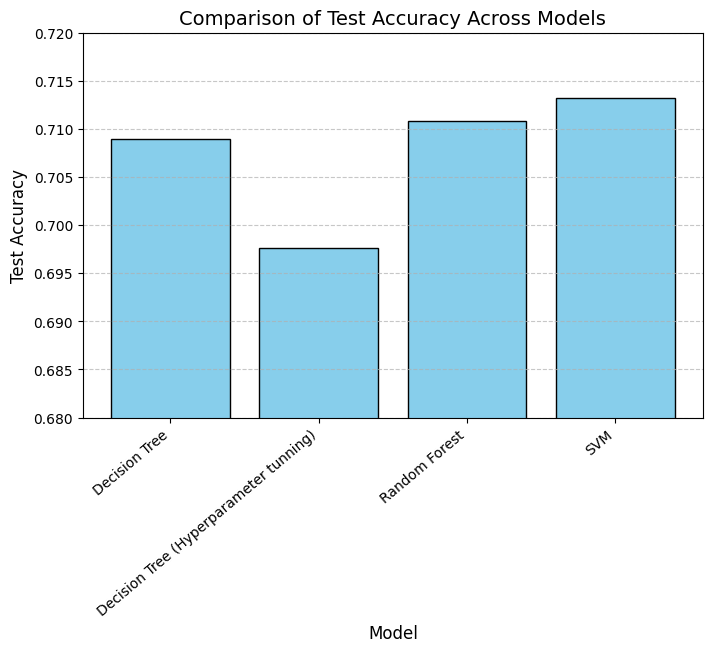

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ["Decision Tree",
          "Decision Tree (Hyperparameter tunning)",
          "Random Forest",
          "SVM"]

accuracies = [0.708982, 0.697605, 0.710778, 0.713174]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.title("Comparison of Test Accuracy Across Models", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.xticks(rotation=40, ha='right')
plt.ylim(0.68, 0.72)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Checking the Test Cases**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris

# Load data

# Feature selection
selector = SelectKBest(score_func=chi2, k=4)
X_new = selector.fit_transform(X, y)

print("Selected feature indices:", selector.get_support(indices=True))


In [ ]:
import numpy as np

# Top features used for training
top_features = ['Salary','ExperienceYears','ProductivityScore']

designation_mapping = {0: 'Junior', 1: 'Executive', 2: 'Lead', 3: 'Senior', 4: 'Manager'}

#input test case
test_case = {
    'Salary': 60000,
    'ExperienceYears': 5,
    'ProductivityScore':75
}

# Convert input to array for prediction
user_input = np.array([test_case[feature] for feature in top_features]).reshape(1, -1)

# 1> model Decision Tree
pred1_encoded = dt.predict(user_input)[0]
pred1_label = designation_mapping[pred1_encoded]
print("Decision Tree")
print(f"Predicted encoded class: {pred1_encoded}")
print(f"Predicted Designation: {pred1_label}")

# 2> model Decision Tree (Hyperparameter Tunning)
pred2_encoded = grid_dt.predict(user_input)[0]
pred2_label = designation_mapping[pred2_encoded]
print("\nDecision Tree (Hyperparameter Tunning)")
print(f"Predicted encoded class: {pred2_encoded}")
print(f"Predicted Designation: {pred2_label}")

# 3> model Random Forest
pred3_encoded = rf_best.predict(user_input)[0]
pred3_label = designation_mapping[pred3_encoded]
print("\nRandom Forest")
print(f"Predicted encoded class: {pred3_encoded}")
print(f"Predicted Designation: {pred3_label}")

# 4> model SVM
pred4_encoded = clf.predict(user_input)[0]
pred4_label = designation_mapping[pred4_encoded]
print("\nSVM")
print(f"Predicted encoded class: {pred4_encoded}")
print(f"Predicted Designation: {pred4_label}")

Decision Tree
Predicted encoded class: 3
Predicted Designation: Senior

Decision Tree (Hyperparameter Tunning)
Predicted encoded class: 3
Predicted Designation: Senior

Random Forest
Predicted encoded class: 3
Predicted Designation: Senior

SVM
Predicted encoded class: 3
Predicted Designation: Senior


# **Clustering**

## 1.K-means clustering

In [ ]:
clu = df[['Age', 'Salary', 'ProductivityScore']]
clu.isna().sum()

,0
Age,0
Salary,0
ProductivityScore,0


In [ ]:
import plotly.express as px
fig = px.scatter_3d(clu, x='Age', y='Salary', z='ProductivityScore')
fig.show()

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(clu)
  wcss.append(km.inertia_)

print(wcss)

[5706557900798.009, 1320879164645.987, 455421417641.2637, 176839286515.74323, 124798941919.565, 123393676046.46118, 82516286307.68506, 58962217516.28789, 45584604249.21471, 39521787390.86058]


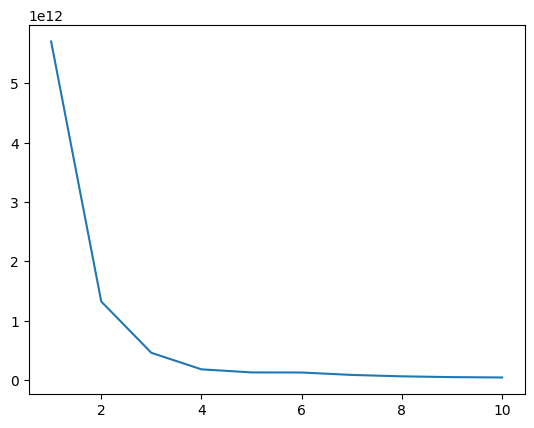

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(clu)
y_predicted

array([0, 0, 0, ..., 2, 0, 1], dtype=int32)

In [ ]:
new_df = pd.DataFrame()
clu = df[['Age', 'Salary', 'ProductivityScore']]
new_df['Age'] = clu['Age']
new_df['Salary'] = clu['Salary']
new_df['ProductivityScore'] = clu['ProductivityScore']
new_df['labels'] = y_predicted
new_df.head()

,Age,Salary,ProductivityScore,labels
0,21,26918.0,65,0
1,38,30960.0,58,0
2,37,30858.0,54,0
3,29,43634.0,53,0
4,27,33096.0,43,0


In [ ]:
fig = px.scatter_3d(new_df, x='Age', y='Salary', z='ProductivityScore', color='labels')
fig.show()

Label 0 -> 30k-40k

Label 1 -> 80k-100k

Label 2 -> 50k-70k

Label 3 -> 25k-35k

In [ ]:
klm.inertia_
silhouette_score(clu, y_predicted)

np.float64(0.7780321073876547)

## **2.hierarchical clustering**

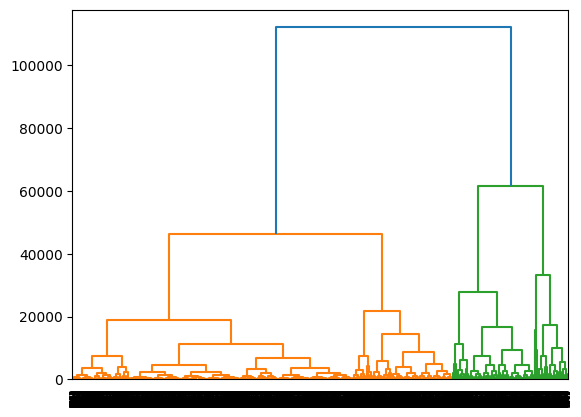

In [ ]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(clu, method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_=cluster.fit_predict(clu)

In [ ]:
fig = px.scatter_3d(x=clu['Age'], y=clu['Salary'], z=clu['ProductivityScore'], color=labels_)
fig.show()

## Evaluation

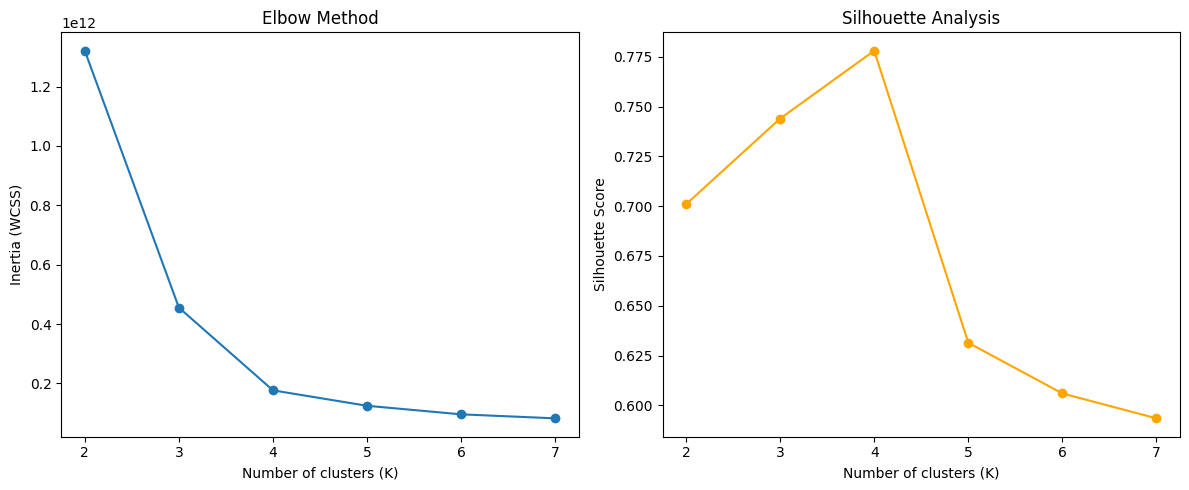

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clu)

    inertias.append(kmeans.inertia_)

    sil_scores.append(silhouette_score(clu, labels))


fig,axes = plt.subplots(1,2,figsize=(12,5))

# Plot Inertia (Elbow method)
axes[0].plot(K_range, inertias, marker='o')
axes[0].set_xlabel("Number of clusters (K)")
axes[0].set_ylabel("Inertia (WCSS)")
axes[0].set_title("Elbow Method")

# Plot Silhouette Scores
axes[1].plot(K_range, sil_scores, marker='o', color='orange')
axes[1].set_xlabel("Number of clusters (K)")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Analysis") # should be above 0.6

plt.tight_layout()
plt.show()
